<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4210_202420_ADL/blob/main/Talleres/Taller%201/Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Challenge Técnico**

 ## **Candidato:** Danilo Andrés Alfonso Bohórquez

# **Problemática: La Falsificación de Productos en Marketplaces como Mercado Libre**

La venta de productos falsificados en marketplaces digitales representa un problema creciente que afecta a consumidores, vendedores legítimos y las propias plataformas de comercio electrónico. En marketplaces como **Mercado Libre**, donde la oferta es vasta y los vendedores pueden operar con relativa facilidad, se ha vuelto común la comercialización de productos que imitan marcas reconocidas, pero que no cumplen con los estándares de calidad ni con los derechos de propiedad intelectual.

## **Impacto de la falsificación**

### **1. Para los consumidores**  
- Pueden ser engañados al comprar productos que parecen auténticos pero que son de menor calidad o incluso peligrosos (ej. medicamentos, cosméticos o electrónicos).  
- En algunos casos, la compra de estos productos puede generar riesgos para la salud o la seguridad.  
- La dificultad para obtener reembolsos o garantías al descubrir que el producto es falso.  

### **2. Para los vendedores legítimos y marcas**  
- Reducción de ventas debido a la competencia desleal de productos falsificados.  
- Daño a la reputación de sus productos y marcas.  
- Pérdidas económicas derivadas de la falta de control sobre su propiedad intelectual.  

### **3. Para el marketplace**  
- Pérdida de confianza por parte de los compradores en la plataforma.  
- Riesgo de enfrentar problemas legales y sanciones por la venta de productos falsificados.  
- Incremento en los costos operativos para implementar sistemas de verificación y eliminación de falsificaciones.  

## **Desafíos en la solución del problema**  
A pesar de los esfuerzos de los marketplaces para implementar sistemas de verificación y denuncias, los falsificadores siguen encontrando formas de eludir los controles. Esto hace que el problema persista y evolucione constantemente, requiriendo mejores estrategias de detección, regulaciones más estrictas y una mayor educación del consumidor sobre cómo identificar productos falsificados.

---



#  Diccionario de Datos

| Campo               | Descripción |
|---------------------|-------------|
| **element_id**      | Id de producto |
| **site_id**         | País |
| **seller_id**       | Id del vendedor |
| **Dominio_normalizado** | Categoría del producto |
| **Titulo**         | Título del producto |
| **Marca**          | Marca publicada del producto |
| **Precio**         | Precio del producto |
| **Rule**           | Regla con la que se moderó la publicación |
| **Score**          | Score del modelo de Machine Learning. Utilizado por la regla "FK_MODELO" |
| **Moderado**       | Flag que indica que el producto fue moderado por alguna regla |
| **Fake**           | Flag que indica que el producto es un producto falsificado. Taggeado de forma manual |
| **Rollback**       | Flag que indica que luego de la moderación, la misma fue revertida por un operador de Atención al Cliente ante reclamo de usuario |
| **FK_TEST1**       | Regla de test. Actualmente apagada. Si detecta que es Fake, FK_TEST1 = 1 |
| **FK_TEST2**       | Regla de test. Actualmente apagada. Si detecta que es Fake, FK_TEST2 = 1 |

📌 **Instrucciones:**  
- Este diccionario de datos describe los campos utilizados en el análisis de productos moderados y falsificados.  


# 0. Configuración Inicial

### 0.1 Importación de Paquetes

In [308]:
# Data Management
import os
import zipfile
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from IPython.display import display, HTML
# Data Upload and Profiling
from google.colab import files

### 0.2 Carga de datos

In [ ]:
# Read csv
import pandas as pd

df = pd.read_csv('data_moderaciones.csv', encoding='latin1', delimiter=';')


Finalmente, podemos comprobar que el dataset fue descargado, descomprimido e importado exitosamente.

In [ ]:
# Showing a sample of csv data
df.head(5)

,element_id,site_id,seller_id,Dominio_normalizado,Titulo,Marca,Precio,Rule,Score,Total,Moderado,Fake,Rollback,FK_TEST1,FK_TEST2
0,ARG1000130348,ARGENTINA,924394736,COMPUTER_PROCESSORS,Microprocesador Intel Core I3 12100 12mb Bx807...,Intel,"222.599,00",NaN,"0,11000",1,"0,00","0,00",0,0,0
1,ARG1002056504,ARGENTINA,60385780,COMPUTER_MONITORS,Monitor Gamer Samsung Con Pantalla De 25 60hz...,Samsung,"767.000,00",NaN,"0,29000",1,"0,00","0,00",0,0,0
2,ARG1002630435,ARGENTINA,1085316688,SUNGLASSES,Anteojos De Sol Polarizados Ray-ban Erika Clas...,Ray-Ban,"246.510,00",NaN,"0,51000",1,"0,00","0,00",0,0,0
3,ARG1003499360,ARGENTINA,189266308,HARD_DRIVES_AND_SSDS,Ssd Externo Kingston Xs1000 1tb Negro Usb 3.2 ...,Kingston,"179.999,00",NaN,"0,32000",1,"0,00","0,00",0,0,0
4,ARG1004623658,ARGENTINA,127503700,RAM_MEMORY_MODULES,Memoria Ram Valueram Color Verde 8gb 1 Kingsto...,Kingston,"22.399,00",NaN,"0,8",1,"0,00","0,00",0,0,0


In [ ]:
# Verificar si hay valores únicos en la columna 'Fake'
df["Fake"].unique()


array(['0,00', '1,00'], dtype=object)

In [ ]:
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])

Filas: 40372
Columnas: 15


# 1 Preprocesamiento de los datos

## 1.1 Tipos de datos

Procederemos a dividir las columnas del dataset en distintos tipos de datos

In [ ]:
# Columns and Datatypes
df.dtypes

,0
element_id,object
site_id,object
seller_id,int64
Dominio_normalizado,object
Titulo,object
Marca,object
Precio,object
Rule,object
Score,object
Total,int64


In [ ]:

# Conversión de tipos
df['element_id'] = df['element_id'].astype(str)


# Convertir a float
df['Precio'] = df['Precio'].astype(str)
df['Precio'] = df['Precio'].str.replace(r'[^\d,.-]', '', regex=True)  # Eliminar símbolos extraños

# Si los valores están en formato "1.234,56", convertimos correctamente
df['Precio'] = df['Precio'].apply(lambda x: x.replace('.', '').replace(',', '.') if ',' in x else x)

# Convertir a float
df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')
df['Score'] = df['Score'].astype(str)
df['Score'] = df['Score'].str.replace(r'[^\d,.-]', '', regex=True)  # Eliminar símbolos extraños

# Si los valores están en formato "1.234,56", convertimos correctamente
df['Score'] = df['Score'].apply(lambda x: x.replace('.', '').replace(',', '.') if ',' in x else x)

# Convertir a float
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
df['Moderado'] =  df["Moderado"].astype(str).str.replace(",", ".").astype(float).astype(bool)
df["Fake"] = df["Fake"].astype(str).str.replace(",", ".").astype(float).astype(bool)


df['site_id'] = df['site_id'].astype(str)
df['seller_id'] = df['seller_id'].astype(int)

df['Rollback'] = df['Rollback'].astype(int)
df['FK_TEST1'] = df['FK_TEST1'].astype(int)
df['FK_TEST2'] = df['FK_TEST2'].astype(int)

# Verificar cambios
print(df.dtypes)


element_id              object
site_id                 object
seller_id                int64
Dominio_normalizado     object
Titulo                  object
Marca                   object
Precio                 float64
Rule                    object
Score                  float64
Total                    int64
Moderado                  bool
Fake                      bool
Rollback                 int64
FK_TEST1                 int64
FK_TEST2                 int64
dtype: object


In [ ]:
df.head()

,element_id,site_id,seller_id,Dominio_normalizado,Titulo,Marca,Precio,Rule,Score,Total,Moderado,Fake,Rollback,FK_TEST1,FK_TEST2
0,ARG1000130348,ARGENTINA,924394736,COMPUTER_PROCESSORS,Microprocesador Intel Core I3 12100 12mb Bx807...,Intel,"222,599.00",NaN,0.11,1,False,False,0,0,0
1,ARG1002056504,ARGENTINA,60385780,COMPUTER_MONITORS,Monitor Gamer Samsung Con Pantalla De 25 60hz...,Samsung,"767,000.00",NaN,0.29,1,False,False,0,0,0
2,ARG1002630435,ARGENTINA,1085316688,SUNGLASSES,Anteojos De Sol Polarizados Ray-ban Erika Clas...,Ray-Ban,"246,510.00",NaN,0.51,1,False,False,0,0,0
3,ARG1003499360,ARGENTINA,189266308,HARD_DRIVES_AND_SSDS,Ssd Externo Kingston Xs1000 1tb Negro Usb 3.2 ...,Kingston,"179,999.00",NaN,0.32,1,False,False,0,0,0
4,ARG1004623658,ARGENTINA,127503700,RAM_MEMORY_MODULES,Memoria Ram Valueram Color Verde 8gb 1 Kingsto...,Kingston,"22,399.00",NaN,0.80,1,False,False,0,0,0


Por lo tanto, tenemos la siguiente clasificación para nuestras variables:

## 1.2 EDA: Análisis Univariado/ Bivariado

## 1.2.1 Variables Texto

Si observamos las variables que el data profilling calificó como tipo texto, podemos observar que no presentan información relevante para nuestro problema de clasificación.

Esto se debe a su alta cardinalidad y problemas en los datos, posiblemente debidos a errores humanos al guardar la información.

### 1.2.2 Variable númericas

Podemos visualizar algunas metricas interesantes de las variables númericas:  

In [ ]:
#Creamos una lista de monedas de cambio por cada uno de los países

# Diccionario de tasas de cambio: site_id -> tasa de cambio a USD
exchange_rates = {
    'ARGENTINA': 1058.40,  # Argentina
    'BRASIL': 5.73,     # Brasil
    'CHILE': 947,      # Chile
    'COLOMBIA': 4081.00,  # Colombia
    'MEXICO': 20.42,    # México
    'PERU': 3.68,     # Perú
}


# Función para convertir el precio a USD
def convertir_a_usd(row):
    tasa_cambio = exchange_rates.get(row['site_id'])
    if tasa_cambio and row['Precio']:
        return row['Precio'] / tasa_cambio
    else:
        return None

# Crear la nueva columna 'Precio_USD'
df['Precio_USD'] = df.apply(convertir_a_usd, axis=1)

# Verificar los cambios
print(df[['site_id', 'Precio', 'Precio_USD']].head())


     site_id     Precio  Precio_USD
0  ARGENTINA 222,599.00      210.32
1  ARGENTINA 767,000.00      724.68
2  ARGENTINA 246,510.00      232.91
3  ARGENTINA 179,999.00      170.07
4  ARGENTINA  22,399.00       21.16


In [306]:
#Validación para el caso de Colombia
df_colombia = df[df['site_id'].str.upper() == 'COLOMBIA']
df_colombia.head(3)

,element_id,site_id,seller_id,Dominio_normalizado,Titulo,Marca,Precio,Rule,Score,Total,Moderado,Fake,Rollback,FK_TEST1,FK_TEST2,Precio_USD,Precio_bin,Rollback_Tasa,Totales
28196,COL100595150,COLOMBIA,952153316,CELLPHONES,Samsung Galaxy A05s Dual Sim 128 Gb Plateado 4...,Samsung,"372,450.00",FK_PRICE,0.99,1,1,1,0,1,0,91.26,$67.22 - $95.45,0.00,1
28197,COL1009357490,COLOMBIA,1588356620,WRISTWATCHES,Reloj Casio Hombre F-94wa-9dg Core Mens,Casio,"153,000.00",NaN,0.04,1,0,0,0,0,0,37.49,$25.78 - $43.26,NaN,0
28198,COL1012961829,COLOMBIA,4286400084,SUNGLASSES,"Gafas De Sol Ray-ban Erika Metal Standard, Col...",Ray-Ban,"700,000.00",NaN,0.14,1,0,0,0,0,0,171.53,$132.3 - $184.81,NaN,0


In [ ]:
# Dividing columns
text_columns = ['element_id','seller_id']
categorical_columns = ['site_id','Moderado'	'Fake	Rollback','FK_TEST1','FK_TEST2']
numeric_columns = ['Score','Precio_USD']

In [ ]:
# Describe for numeric columns
pd.set_option('display.float_format', '{:,.2f}'.format)
df[numeric_columns].describe()

,Score,Precio_USD
count,"40,372.00","40,372.00"
mean,0.43,348.57
std,0.33,560.56
min,0.00,1.74
25%,0.15,54.21
50%,0.31,132.30
75%,0.81,350.63
max,1.00,"9,130.40"


### 1.2.3 Comparación del Precio (Productos legítimos) vs (Productos Falsos)

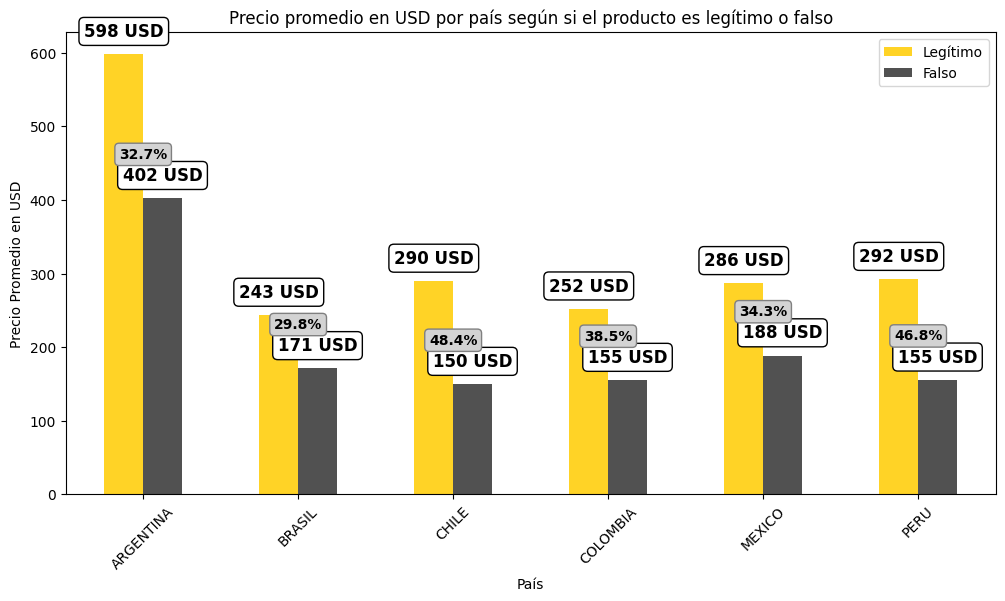

In [ ]:
#  Calcular el precio promedio por país y autenticidad del producto
precio_promedio_por_pais = df.groupby(["site_id", "Fake"])["Precio_USD"].mean().unstack()

precio_promedio_por_pais.rename(columns={False: "Legítimo", True: "Falso"}, inplace=True)

precio_promedio_por_pais["Diferencia (%)"] = (
    (precio_promedio_por_pais["Legítimo"] - precio_promedio_por_pais["Falso"]) / precio_promedio_por_pais["Legítimo"]
) * 100

mercado_libre_colors = ["#FFCC00", "#333333"]

fig, ax = plt.subplots(figsize=(12, 6))

# Graficar barras
precio_promedio_por_pais[["Legítimo", "Falso"]].plot(kind="bar", ax=ax, alpha=0.85, color=mercado_libre_colors)
ax.set_xlabel("País")
ax.set_ylabel("Precio Promedio en USD")
ax.set_title("Precio promedio en USD por país según si el producto es legítimo o falso")
ax.legend(["Legítimo", "Falso"])
ax.set_xticklabels(precio_promedio_por_pais.index, rotation=45)

ax.grid(False)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        offset = 0.03 * ax.get_ylim()[1]
        ax.annotate(f'{height:,.0f} USD',
                    (p.get_x() + p.get_width() / 2., height + offset),
                    ha='center', va='bottom', fontsize=12, fontweight='bold', color='black',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

#  Agregar etiquetas con la diferencia porcentual en cada país (sobre la barra falsa)
for i, (idx, row) in enumerate(precio_promedio_por_pais.iterrows()):
    diff = row["Diferencia (%)"]
    offset = 0.08 * ax.get_ylim()[1]
    ax.annotate(f'{diff:.1f}%',
                (i, max(row["Falso"], 0) + offset),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black',
                bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.3'))
plt.show()




##  Tendencias Generales
- **Los productos legítimos son más caros en todos los países** en comparación con los productos falsos.
- La **diferencia de precio varía significativamente por país**, lo que sugiere que en algunos países los productos falsos tienen un precio muy inferior al original, mientras que en otros la brecha es menor.

##  1.2.3.1 Comparación por País
| País       | Precio Legítimo (USD) | Precio Falso (USD) | Diferencia (%) |
|------------|----------------------|--------------------|----------------|
| **Argentina** | 598 | 402 | -32.7% |
| **Brasil** | 243 | 171 | -29.8% |
| **Chile** | 290 | 150 | -48.4% |
| **Colombia** | 252 | 155 | -38.5% |
| **México** | 286 | 188 | -34.3% |
| **Perú** | 292 | 155 | -46.8% |

## 1.2.3.2. Análisis por Porcentajes
- Los países con **mayor reducción porcentual** entre productos legítimos y falsos son **Chile (-48.4%) y Perú (-46.8%)**, indicando que en estos países los productos falsos tienen precios mucho más bajos.
- **Brasil (-29.8%) y Argentina (-32.7%)** tienen diferencias más pequeñas, sugiriendo que los productos falsificados en estos países tienen precios relativamente más cercanos a los originales.

##  Conclusión
- **La falsificación representa una reducción significativa en el precio en todos los países**, variando entre **-29.8% y -48.4%**.
- **Chile y Perú tienen la mayor diferencia porcentual**, lo que indica que los productos falsos en estos países se venden a precios mucho más bajos.
- **Argentina, Brasil y México tienen diferencias menores**, lo que podría sugerir que los productos falsificados en estos países tienen una percepción de mayor calidad o que los consumidores están dispuestos a pagar más por ellos.


### 1.2.4 Distribución de los precios (USD)

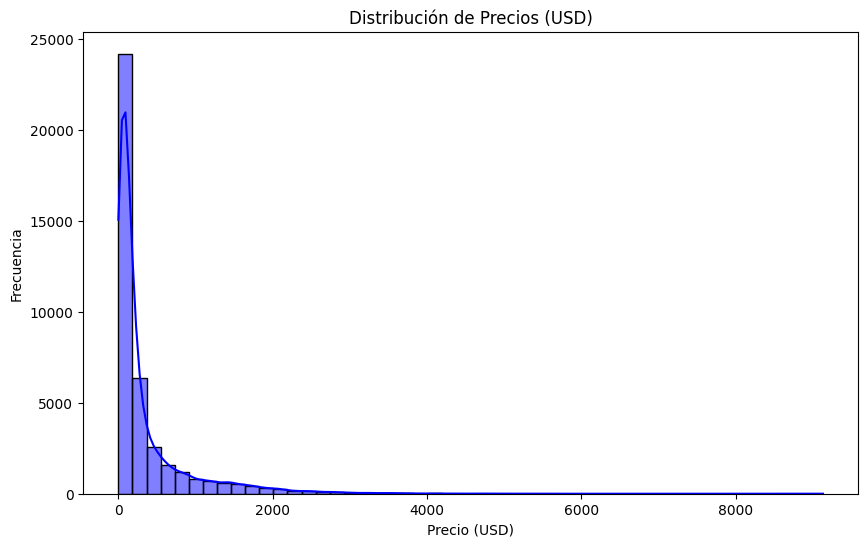

In [ ]:
# Crear un histograma de los precios
plt.figure(figsize=(10, 6))
sns.histplot(df['Precio_USD'], bins=50, kde=True, color='blue')
plt.title('Distribución de Precios (USD)')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.show()


### 1.2.5 Precio Promedio por Categoria y Marca en dólares(USD)

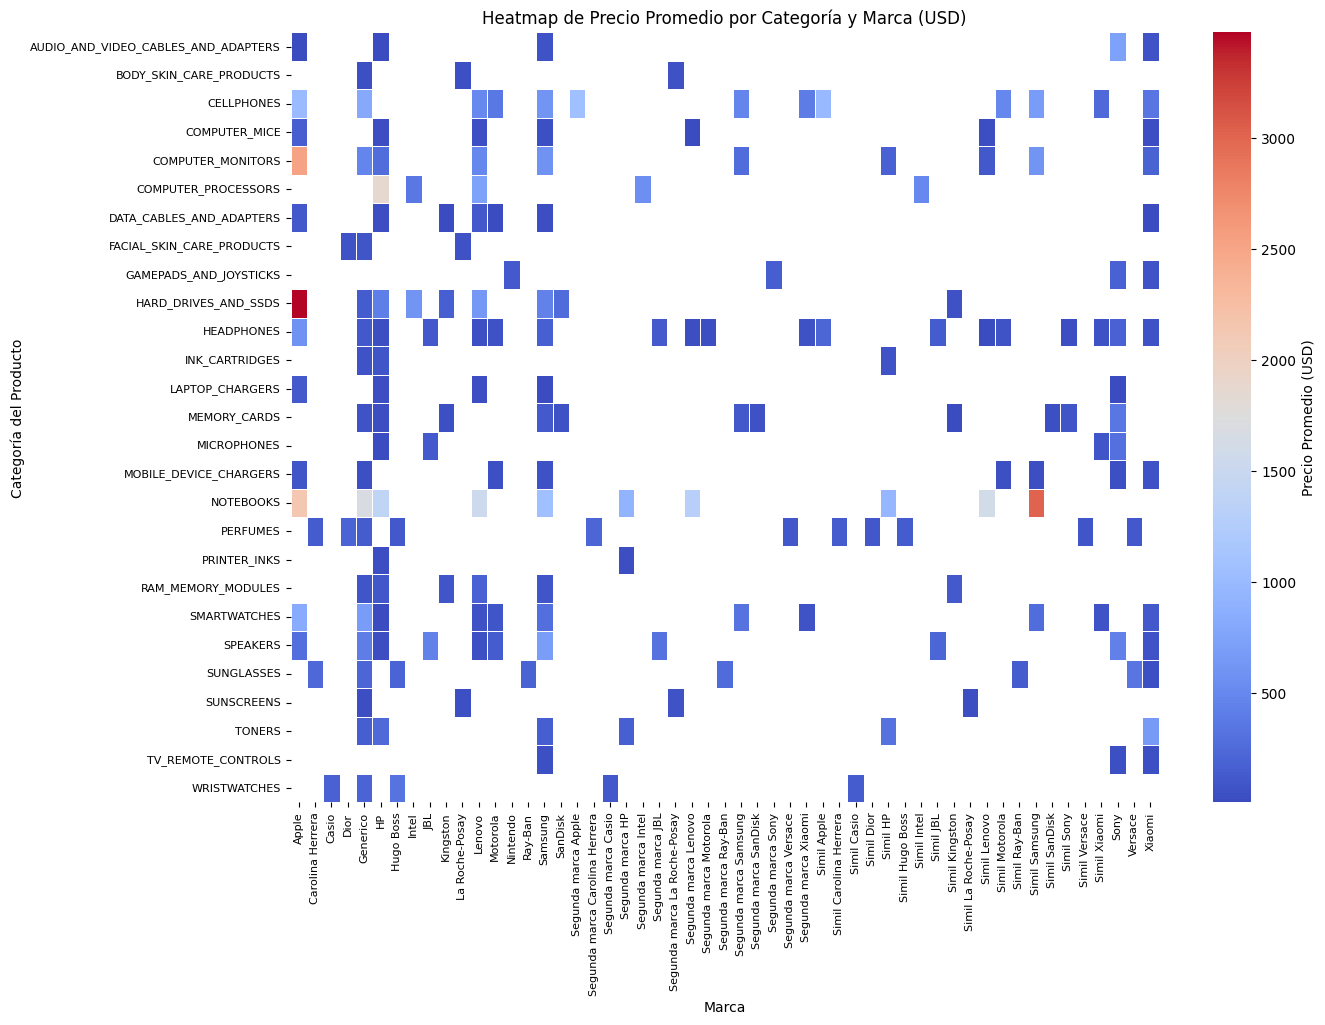

In [ ]:

if "Precio_USD" in df.columns and "Marca" in df.columns and "Dominio_normalizado" in df.columns:
    # Calcular el precio promedio por categoría y marca
    heatmap_data = df.groupby(["Dominio_normalizado", "Marca"])["Precio_USD"].mean().unstack()

    # Eliminar valores nulos para que solo queden las marcas que realmente venden en esa categoría
    heatmap_data = heatmap_data.dropna(how="all", axis=0).dropna(how="all", axis=1)

    plt.figure(figsize=(14, 10))
    sns.heatmap(
        heatmap_data, cmap="coolwarm", annot=False, linewidths=0.5,
        cbar_kws={'label': 'Precio Promedio (USD)'}
    )
    plt.title("Heatmap de Precio Promedio por Categoría y Marca (USD)")
    plt.xlabel("Marca")
    plt.ylabel("Categoría del Producto")
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()
else:
    print("No se encontraron las columnas necesarias para el heatmap.")






### 1.2.5.1 Diferencias Significativas de Precio entre Marcas
- En categorías como **Hard Drives and SSDs, Headphones y Perfumes**, algunas marcas tienen precios significativamente más altos (zonas rojas).
- Esto sugiere que ciertas marcas dominan el segmento premium, mientras que otras ofrecen alternativas más asequibles.

### 1.2.5.2 "Segundas Marcas" y "Simil" con Precios Más Bajos
- Muchas marcas con etiquetas como **"Simil" y "Segunda Marca"** tienen celdas azul oscuro, indicando precios mucho más bajos.
- Esto sugiere una fuerte presencia de productos alternativos a las marcas originales en algunas categorías.

### 1.2.5.3 Alta Dispersión de Precios en Algunas Categorías
- En **Computadoras, Relojes y Celulares**, hay productos con precios extremadamente altos y otros con precios bajos dentro de la misma categoría.
- Esto indica la presencia de modelos premium y versiones más accesibles en el mercado.

### 1.2.5.4 Categorías con Precios Consistentemente Bajos
- **TV Remote Controls, Ink Cartridges y Memory Cards** muestran tendencias hacia precios bajos en todas las marcas.
- Esto indica que estas categorías están más **commoditizadas**, es decir, los productos son similares entre marcas y compiten principalmente en precio.

### 1.2.5.4 Marcas Premium con Presencia en Múltiples Categorías
- Marcas como **Apple, Samsung y Xiaomi** aparecen en varias categorías con precios elevados.
- Esto indica que mantienen un posicionamiento premium en distintos segmentos.

### 1.2.5.5  Patrones en Tecnología vs. Moda y Cuidado Personal
- En **computadoras y procesadores**, los precios están más distribuidos (mezcla de azul y rojo).
- En **perfumes y gafas de sol**, hay un mayor número de precios elevados en pocas marcas dominantes.

---




### 1.2.6 Relación del precio con las moderaciones y las falsificaciones

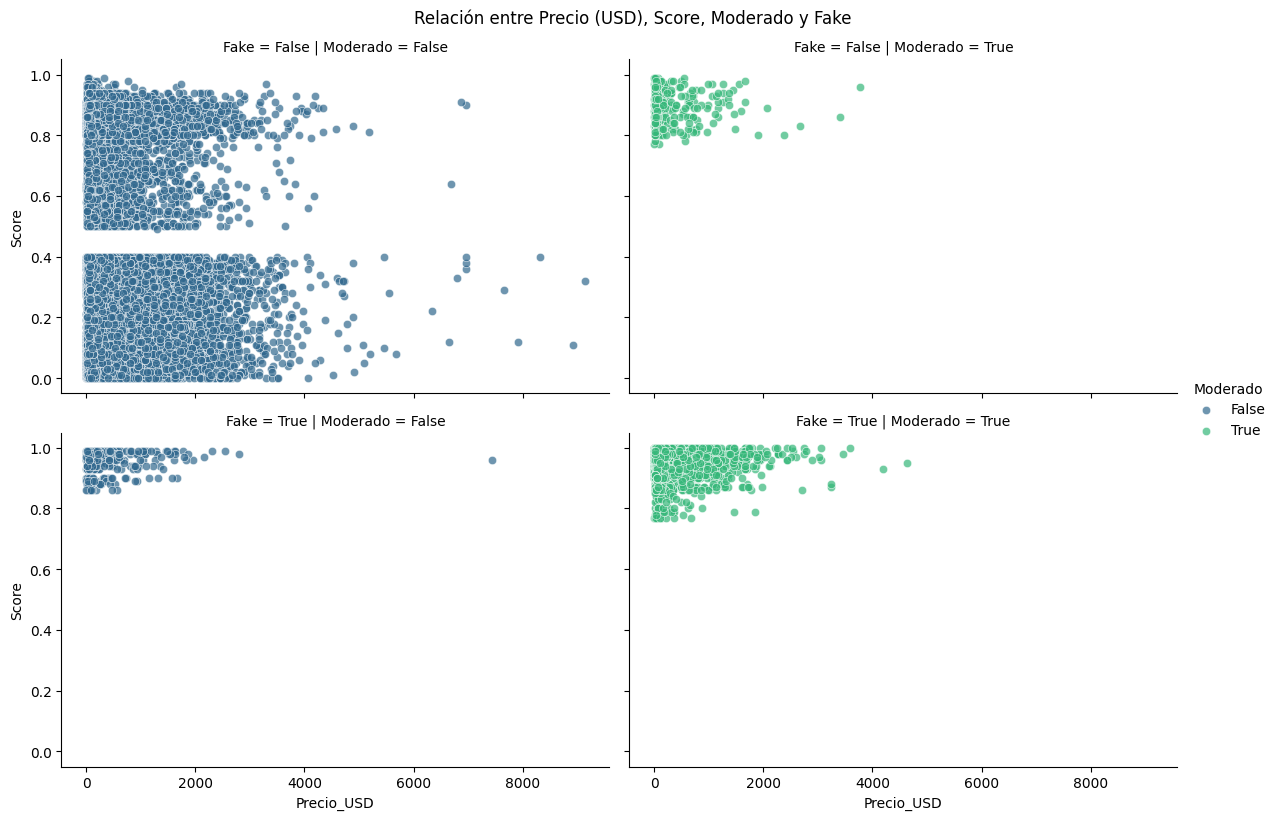

In [ ]:
g = sns.FacetGrid(df, col='Moderado', row='Fake', hue='Moderado', palette='viridis', height=4, aspect=1.5)
g.map(sns.scatterplot, 'Precio_USD', 'Score',alpha=0.7, sizes=(20, 200))
g.add_legend(title='Moderado')
plt.suptitle('Relación entre Precio (USD), Score, Moderado y Fake', y=1.02)
plt.show()


- La mayoría de los productos legítimos no moderados tienen Scores bajos, pero algunos tienen incertidumbre en la clasificación.
- Los productos legítimos moderados son escasos y tienen alta confianza en su autenticidad.
- Los productos falsos no moderados suelen ser baratos y detectados con alta certeza.
- Los productos falsos moderados tienen una mayor dispersión de precios, lo que sugiere falsificaciones premium.
- Revisar los productos con Scores intermedios (0.5 - 0.7), ya que podrían necesitar verificación manual adicional.

In [ ]:
# Asegurar que 'Moderado' y 'Fake' sean booleanos
df["Moderado"] = df["Moderado"].astype(str).str.strip().map({"True": True, "False": False})
df["Fake"] = df["Fake"].astype(str).str.strip().map({"True": True, "False": False})

# Confirmar que la conversión fue exitosa
print(df[["Moderado", "Fake"]].dtypes)


Moderado    bool
Fake        bool
dtype: object


### 1.2.7 Tasa de moderación y falsificación por rangos de precio en USD

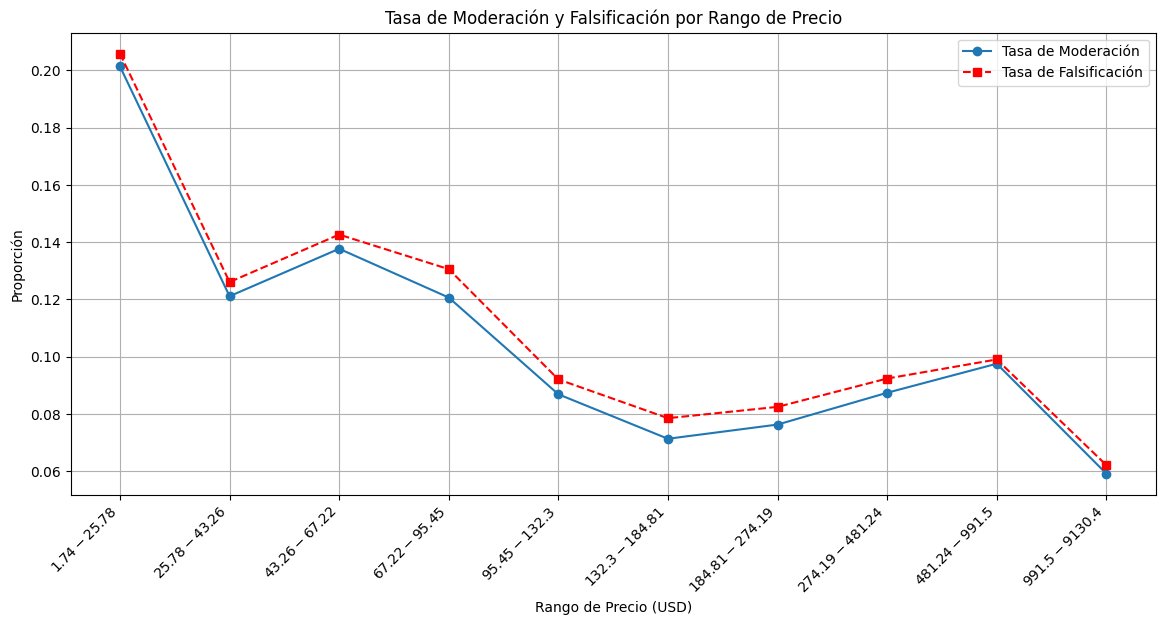

In [ ]:
precio_bins, bin_edges = pd.qcut(df["Precio_USD"], q=10, duplicates="drop", retbins=True)

precio_labels = [f"${round(bin_edges[i], 2)} - ${round(bin_edges[i+1], 2)}" for i in range(len(bin_edges)-1)]
df["Precio_bin"] = pd.qcut(df["Precio_USD"], q=10, duplicates="drop", labels=precio_labels)

# Calcular tasas de moderación y falsificación con `observed=True`
moderacion_rate = df.groupby("Precio_bin", observed=True)["Moderado"].mean()
fake_rate = df.groupby("Precio_bin", observed=True)["Fake"].mean()

plt.figure(figsize=(14, 6))
plt.plot(precio_labels, moderacion_rate, marker="o", linestyle="-", label="Tasa de Moderación")
plt.plot(precio_labels, fake_rate, marker="s", linestyle="--", color="red", label="Tasa de Falsificación")

plt.title("Tasa de Moderación y Falsificación por Rango de Precio")
plt.xlabel("Rango de Precio (USD)")
plt.ylabel("Proporción")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid()
plt.show()




- **Los productos más baratos tienen la tasa de falsificación y moderación más alta**

En el primer rango de precios (**1.14 - 25.78**), la tasa de falsificación y la tasa de moderación son las más altas (20%).
Esto sugiere que los productos de bajo costo son más propensos a falsificación y requieren más moderación para verificar su autenticidad.
Ejemplo: Accesorios electrónicos, memorias USB, cargadores, cosméticos económicos, etc.
- **A medida que el precio aumenta, ambas tasas disminuyen hasta los $132.3 USD**

La moderación y la falsificación bajan gradualmente, lo que indica que los productos en este rango tienen menor riesgo de ser falsificados.
Es posible que los productos en este rango sean menos atractivos para falsificadores o que tengan más barreras de autenticidad.

-**Entre 274.19 y 991.5 USD, la falsificación y la moderación aumentan nuevamente**

En este rango de precios se observa un repunte en la tasa de falsificación y moderación.
Esto puede deberse a que los productos de gama media-alta comienzan a atraer más falsificaciones (ejemplo: electrónicos, relojes, perfumes premium).

- **Los productos más caros (+991.5 USD) tienen la tasa más baja de moderación y falsificación**

Esto puede indicar que los productos de gama alta tienen menos falsificaciones o mejores controles de autenticidad.
Otra posibilidad es que estos productos tengan menor volumen de ventas, por lo que hay menos revisiones y menos falsificaciones en comparación con otras categorías.

### 1.2.8 Cantidad de productos y precio promedio por vendedor (Legítimos y Falsos)

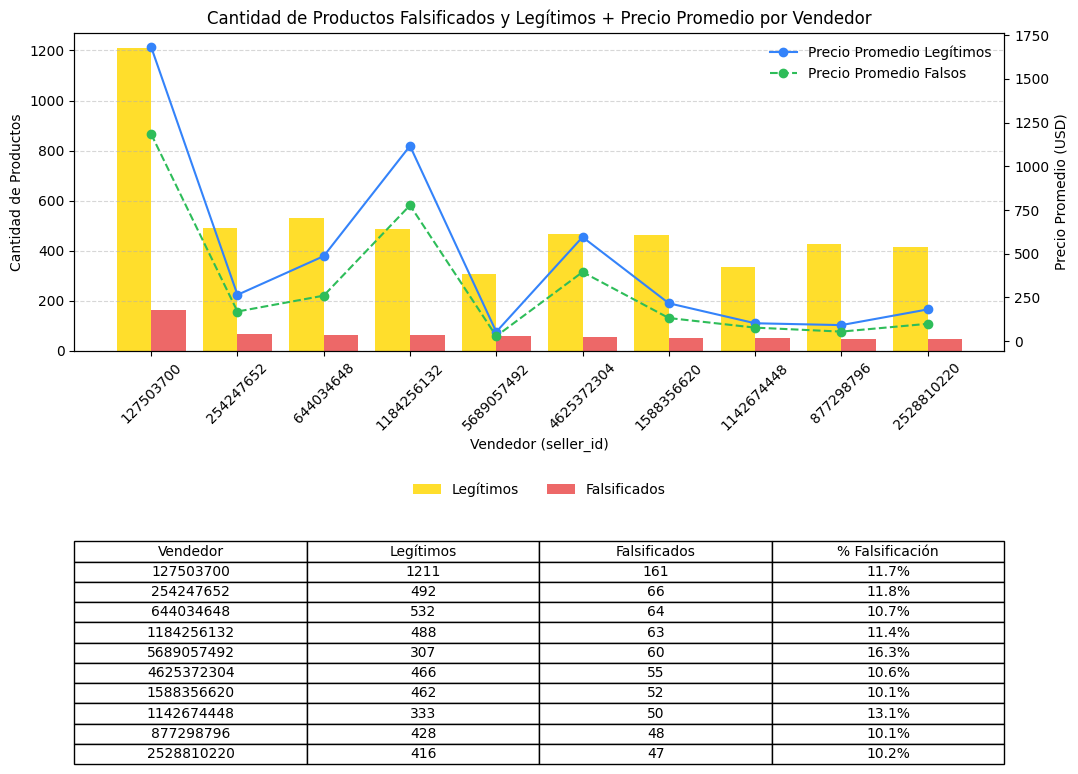

In [ ]:
meli_yellow = "#FFDB15"
meli_red = "#EB5757"
meli_blue = "#3483FA"
meli_green = "#2EBD59"

# Agrupar datos por vendedor y calcular métricas
sellers_stats = df.groupby("seller_id").agg(
    Productos_Totales=("Fake", "count"),
    Productos_Falsificados=("Fake", "sum"),
    Precio_Promedio_Legitimos=("Precio_USD", lambda x: np.mean(x[df.loc[x.index, "Fake"] == False])),
    Precio_Promedio_Falsos=("Precio_USD", lambda x: np.mean(x[df.loc[x.index, "Fake"] == True]))
)

# Calcular productos legítimos
sellers_stats["Productos_Legitimos"] = sellers_stats["Productos_Totales"] - sellers_stats["Productos_Falsificados"]
# Calcular porcentaje de falsificaciones sobre el total
sellers_stats["% Falsificación"] = (sellers_stats["Productos_Falsificados"] / sellers_stats["Productos_Totales"]) * 100

# Ordenar por vendedores con más productos falsificados
top_sellers = sellers_stats.sort_values("Productos_Falsificados", ascending=False).head(10)
fig, ax1 = plt.subplots(figsize=(12, 6))
bar_width = 0.4
x = np.arange(len(top_sellers.index))
ax1.bar(x - bar_width/2, top_sellers["Productos_Legitimos"], bar_width, label="Legítimos", color=meli_yellow, alpha=0.9)
ax1.bar(x + bar_width/2, top_sellers["Productos_Falsificados"], bar_width, label="Falsificados", color=meli_red, alpha=0.9)
ax1.set_xlabel("Vendedor (seller_id)")
ax1.set_ylabel("Cantidad de Productos")
ax1.set_title("Cantidad de Productos Falsificados y Legítimos + Precio Promedio por Vendedor")
ax1.set_xticks(x)
ax1.set_xticklabels(top_sellers.index, rotation=45)


ax1.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5), ncol=2, frameon=False)
ax2 = ax1.twinx()
ax2.plot(x, top_sellers["Precio_Promedio_Legitimos"], marker="o", linestyle="-", color=meli_blue, label="Precio Promedio Legítimos")
ax2.plot(x, top_sellers["Precio_Promedio_Falsos"], marker="o", linestyle="--", color=meli_green, label="Precio Promedio Falsos")
ax2.set_ylabel("Precio Promedio (USD)")
ax2.legend(loc="upper right", frameon=False)
ax1.grid(axis="y", linestyle="--", alpha=0.5)

# Agregar tabla con el porcentaje de falsificación
table_data = []
for i, seller in enumerate(top_sellers.index):
    table_data.append([
        str(seller),  # Seller ID
        f"{top_sellers['Productos_Legitimos'].iloc[i]}",  # Productos legítimos
        f"{top_sellers['Productos_Falsificados'].iloc[i]}",  # Productos falsificados
        f"{top_sellers['% Falsificación'].iloc[i]:.1f}%"  # % Falsificación
    ])


table = plt.table(cellText=table_data,
                  colLabels=["Vendedor", "Legítimos", "Falsificados", "% Falsificación"],
                  cellLoc="center", loc="bottom", bbox=[0, -1.3, 1, 0.7])
plt.subplots_adjust(bottom=0.35)
plt.show()





 ### 1.2.8.1 Relación Entre Precio Promedio y Falsificación  
 - En la mayoría de los vendedores, los precios promedio de los productos falsificados (línea verde punteada) son menores que los legítimos (línea azul).

 - El vendedor `1583856620` tiene precios promedio de falsificados casi idénticos a los de los legítimos, lo que sugiere posibles falsificaciones premium.  

- El vendedor `1142674448` tiene falsificaciones con precios similares a los legítimos, lo que indica que podría estar vendiendo productos de imitación de alto valor.

1. **Los vendedores con una alta tasa de falsificación (+10%) deben ser investigados para detectar posibles patrones fraudulentos.**  
2. **Si los precios de los productos falsificados son similares a los legítimos, podría haber falsificaciones premium que engañan a los compradores.**  
3. **Vendedores como `127503700` tienen un alto volumen de falsificaciones, pero su impacto relativo es menor debido a su gran cantidad de productos legítimos.**   

### 1.2.8.1 ¿Pero cómo se perciben actualmente?

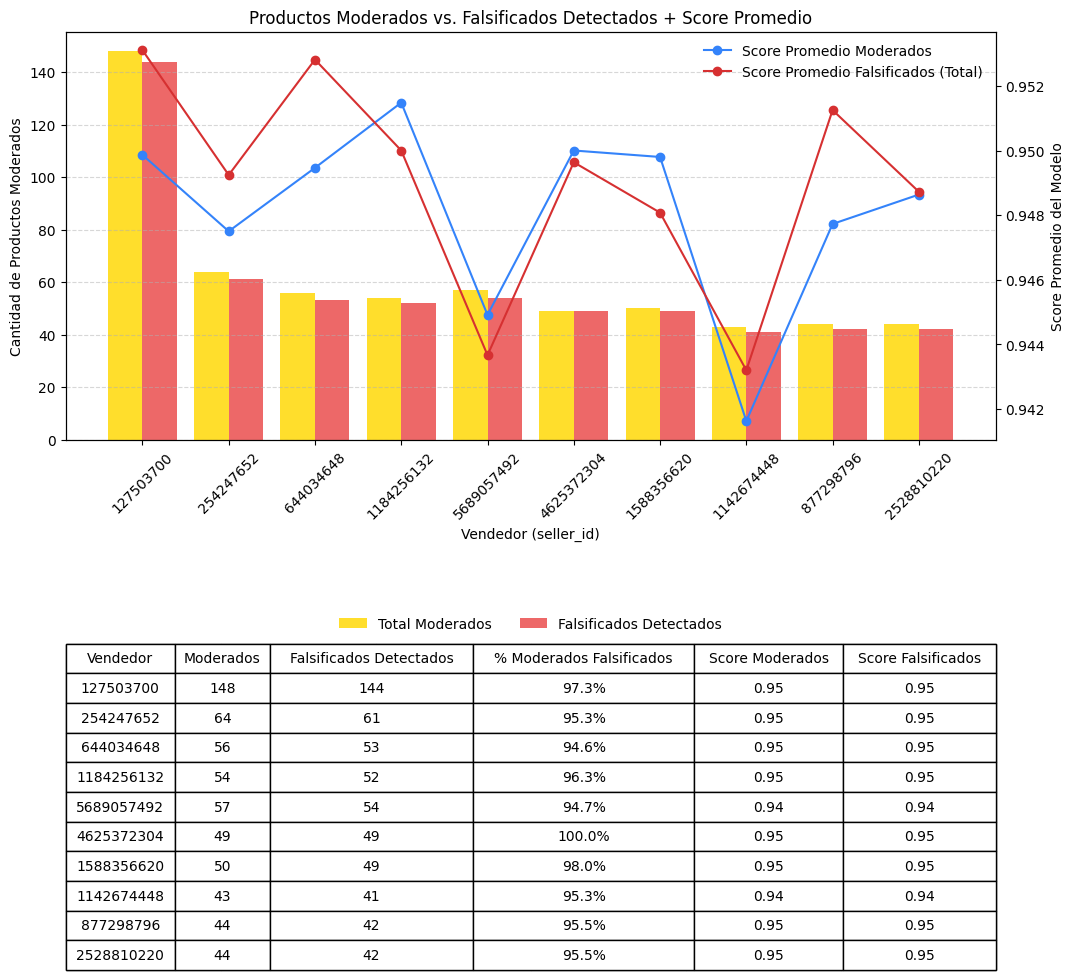

In [ ]:
# Calcular métricas de moderación y score por vendedor
sellers_moderacion = df.groupby("seller_id").agg(
    Productos_Moderados=("Moderado", "sum"),
    Falsificados_Detectados=("Fake", lambda x: sum(x & df.loc[x.index, "Moderado"])),  # Falsos detectados tras moderación
    Score_Promedio_Moderados=("Score", lambda x: np.mean(x[df.loc[x.index, "Moderado"]])),
    Score_Promedio_Falsificados_Detectados=("Score", lambda x: np.mean(x[x.index & df.loc[x.index, "Fake"] & df.loc[x.index, "Moderado"]])),
    Score_Promedio_Falsificados_Total=("Score", lambda x: np.mean(x[df.loc[x.index, "Fake"]]))  # Score de TODOS los falsificados
)

# Calcular proporción de falsificados sobre los moderados
sellers_moderacion["% Moderados Falsificados"] = (sellers_moderacion["Falsificados_Detectados"] / sellers_moderacion["Productos_Moderados"]) * 100

# Unir con el top 10 vendedores con más falsificaciones
top_sellers_moderacion = sellers_moderacion.loc[top_sellers.index]


fig, ax1 = plt.subplots(figsize=(12, 6))


bar_width = 0.4
x = np.arange(len(top_sellers_moderacion.index))

ax1.bar(x - bar_width/2, top_sellers_moderacion["Productos_Moderados"], bar_width, color="#FFDB15", alpha=0.9, label="Total Moderados")
ax1.bar(x + bar_width/2, top_sellers_moderacion["Falsificados_Detectados"], bar_width, color="#EB5757", alpha=0.9, label="Falsificados Detectados")

ax1.set_xlabel("Vendedor (seller_id)")
ax1.set_ylabel("Cantidad de Productos Moderados")
ax1.set_title("Productos Moderados vs. Falsificados Detectados + Score Promedio")
ax1.set_xticks(x)
ax1.set_xticklabels(top_sellers_moderacion.index, rotation=45)
ax1.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5), ncol=2, frameon=False)
ax2 = ax1.twinx()
ax2.plot(x, top_sellers_moderacion["Score_Promedio_Moderados"], marker="o", linestyle="-", color="#3483FA", label="Score Promedio Moderados")
ax2.plot(x, top_sellers_moderacion["Score_Promedio_Falsificados_Total"], marker="o", linestyle="-", color="#D63031", label="Score Promedio Falsificados (Total)")
ax2.set_ylabel("Score Promedio del Modelo")

ax2.legend(loc="upper right", frameon=False)

ax1.grid(axis="y", linestyle="--", alpha=0.5)
table_data = []
for i, seller in enumerate(top_sellers_moderacion.index):
    moderados = top_sellers_moderacion["Productos_Moderados"].iloc[i]
    falsificados_detectados = top_sellers_moderacion["Falsificados_Detectados"].iloc[i]
    porcentaje_falsos = top_sellers_moderacion["% Moderados Falsificados"].iloc[i]
    score_moderados = top_sellers_moderacion["Score_Promedio_Moderados"].iloc[i]
    score_falsificados_detectados = top_sellers_moderacion["Score_Promedio_Falsificados_Detectados"].iloc[i]
    score_falsificados_total = top_sellers_moderacion["Score_Promedio_Falsificados_Total"].iloc[i]

    table_data.append([
        str(seller),
        f"{moderados}",
        f"{falsificados_detectados}",
        f"{porcentaje_falsos:.1f}%",
        f"{score_moderados:.2f}",
        f"{score_falsificados_total:.2f}"
    ])

table = plt.table(cellText=table_data,
                  colLabels=["Vendedor", "Moderados", "Falsificados Detectados", "% Moderados Falsificados", "Score Promedio Moderados", "Score Promedio Falsificados"],
                  cellLoc="center", loc="bottom", bbox=[0, -1.3, 1, 0.8])
num_columnas = len(table_data[0])
table = plt.table(cellText=table_data,
                  colLabels=["Vendedor", "Moderados", "Falsificados Detectados", "% Moderados Falsificados", "Score Moderados", "Score Falsificados"],
                  cellLoc="center", loc="bottom", bbox=[0, -1.3, 1, 0.8])

table.auto_set_font_size(False)
table.set_fontsize(12)


for cell in table.get_celld().values():
    cell.set_fontsize(10)  #

for i in range(num_columnas):
    table.auto_set_column_width([i])

# Ajustar la distancia entre la tabla y el gráfico
plt.subplots_adjust(bottom=0.2)
plt.show()






- El Score Promedio de los productos moderados (línea azul) es similar al de los falsificados en general (línea roja).
- En la mayoría de los casos, los productos falsificados detectados tenían un score de 0.95 o más, lo que indica que el modelo de detección está funcionando correctamente.
-El vendedor 5689057492 tiene el Score Promedio más bajo para los falsificados (~0.94), lo que podría significar que sus productos falsos son más difíciles de detectar.

#  1.2.9 Las marcas y su relación con la falsificación

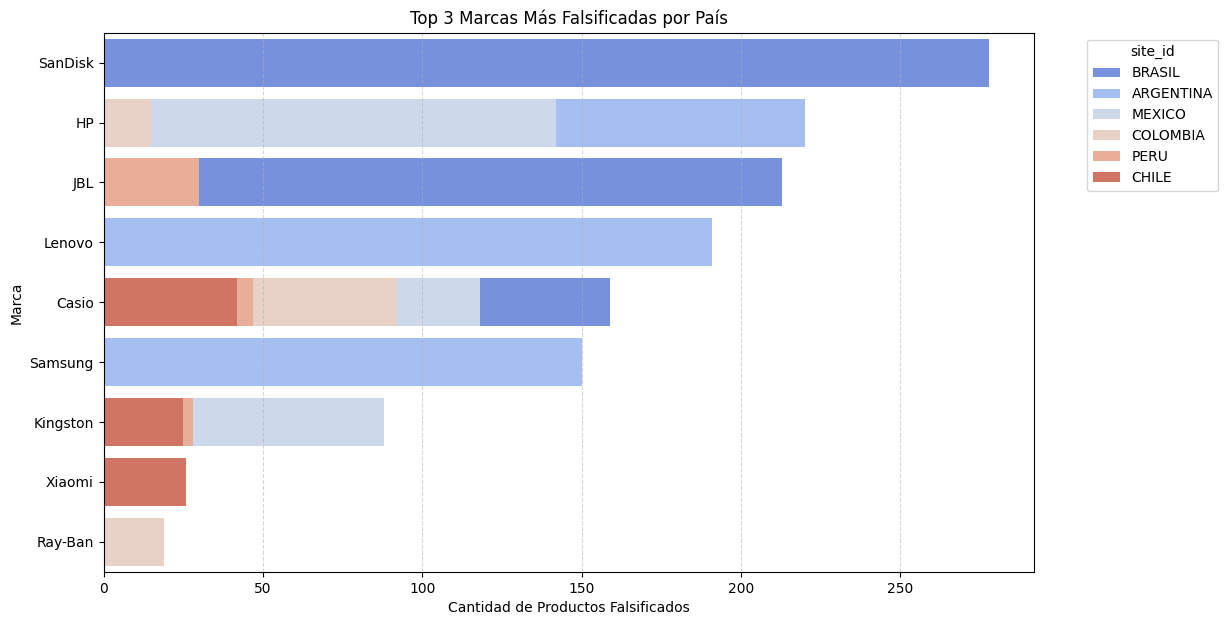

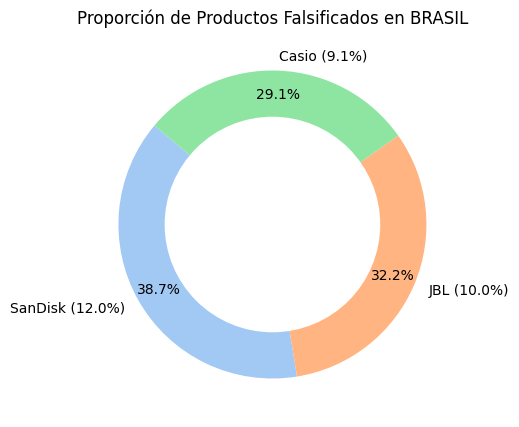

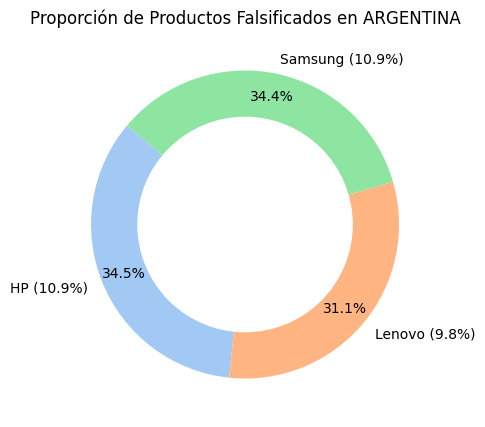

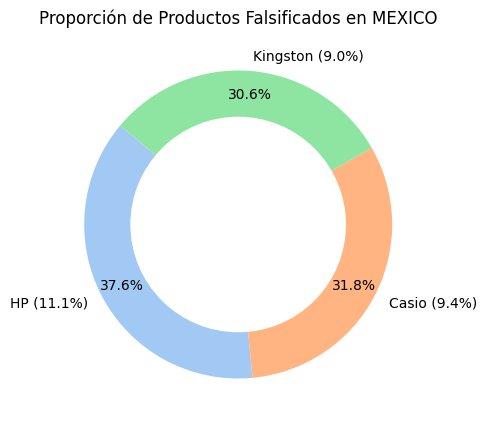

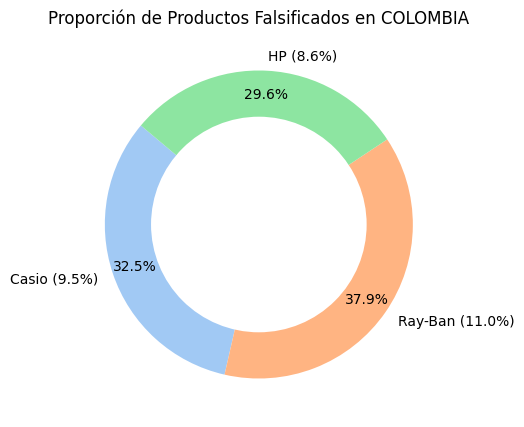

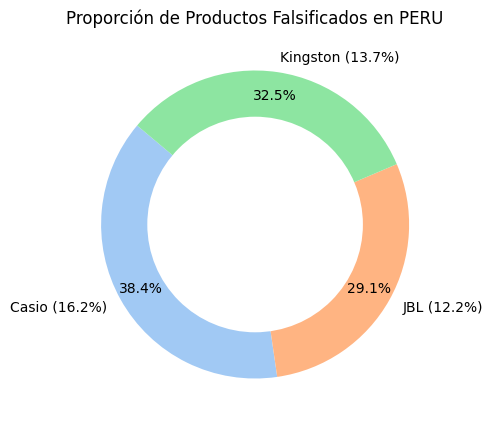

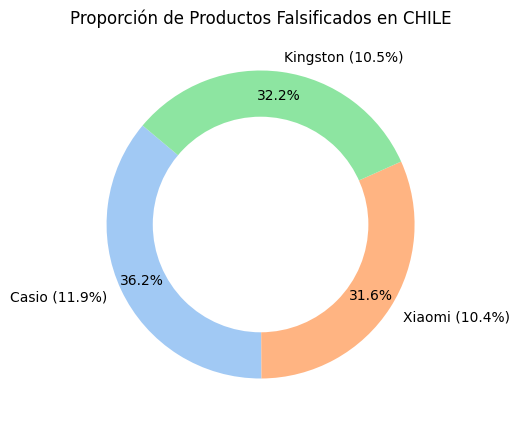

In [ ]:

if {"site_id", "Marca", "Fake"}.issubset(df.columns):
    df_falsificados = df[df["Fake"] == True]
    top_marcas_por_site = (
        df_falsificados.groupby(["site_id", "Marca"])
        .size()
        .reset_index(name="Conteo_Falsificados")
    )
    top_marcas_por_site = (
        top_marcas_por_site.sort_values(["site_id", "Conteo_Falsificados"], ascending=[True, False])
        .groupby("site_id")
        .head(3)
    )

    total_por_marca_site = df.groupby(["site_id", "Marca"]).size().reset_index(name="Total_Productos")
    df_merged = pd.merge(top_marcas_por_site, total_por_marca_site, on=["site_id", "Marca"])
    df_merged["Porcentaje_Falsificados"] = (df_merged["Conteo_Falsificados"] / df_merged["Total_Productos"]) * 100
    df_merged = df_merged.sort_values("Conteo_Falsificados", ascending=False)
    plt.figure(figsize=(12, 7))
    sns.barplot(
        data=df_merged,
        x="Conteo_Falsificados",
        y="Marca",
        hue="site_id",
        palette="coolwarm",
        dodge=False
    )

    plt.title("Top 3 Marcas Más Falsificadas por País")
    plt.xlabel("Cantidad de Productos Falsificados")
    plt.ylabel("Marca")
    plt.legend(title="site_id", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis="x", linestyle="--", alpha=0.5)


    plt.show()

    for site in df_merged["site_id"].unique():
        df_site = df_merged[df_merged["site_id"] == site]
        fig, ax = plt.subplots(figsize=(8, 5))

        labels = [f"{marca} ({pct:.1f}%)" for marca, pct in zip(df_site["Marca"], df_site["Porcentaje_Falsificados"])]
        wedges, texts, autotexts = ax.pie(
            df_site["Porcentaje_Falsificados"],
            labels=labels,
            autopct='%1.1f%%',
            pctdistance=0.85,
            startangle=140,
            colors=sns.color_palette("pastel")
        )
        centre_circle = plt.Circle((0, 0), 0.70, fc='white')
        fig.gca().add_artist(centre_circle)
        for text in texts + autotexts:
            text.set_fontsize(10)

        plt.title(f"Proporción de Productos Falsificados en {site}")
        plt.show()

else:
    print("No se encontraron las columnas necesarias en el DataFrame.")



**SanDisk domina el ranking de falsificaciones**

Es la marca más falsificada en casi todos los países, con un volumen superior a 250 productos.
Destaca principalmente en Brasil y Argentina, donde el número de falsificaciones es mayor.
 **HP y JBL también están altamente falsificadas**

HP es falsificada sobre todo en Argentina y México, lo que sugiere problemas con productos tecnológicos falsificados en estos mercados.
JBL tiene una fuerte presencia de falsificaciones en varios países, posiblemente debido a la alta demanda de audífonos y bocinas económicas.

**Lenovo y Samsung aparecen en el top**

Lenovo tiene presencia en Brasil, Argentina y México, lo que indica que los productos de computación también están siendo falsificados.
Samsung tiene un volumen alto de falsificaciones, lo que puede estar relacionado con la popularidad de sus dispositivos electrónicos.

**Casio, Kingston y Xiaomi son objetivos específicos en algunos países**

Casio aparece especialmente falsificado en Chile y Colombia, lo que sugiere una mayor vulnerabilidad de la marca en esos mercados.
Xiaomi está en el top de falsificaciones en algunos países, lo cual indica que los dispositivos de esta marca, conocidos por su relación calidad-precio, son replicados en el mercado.
Kingston, al igual que SanDisk, sugiere que los accesorios de almacenamiento son altamente susceptibles a falsificación.

**Ray-Ban es la única marca de moda que aparece en el ranking**

Indica que los productos de lujo/accesorios como gafas de sol también son falsificados principalmente en Colombia, aunque en menor volumen que los productos tecnológicos.

### 1.2.10 Cantidad de productos, moderados y falsificados por marca

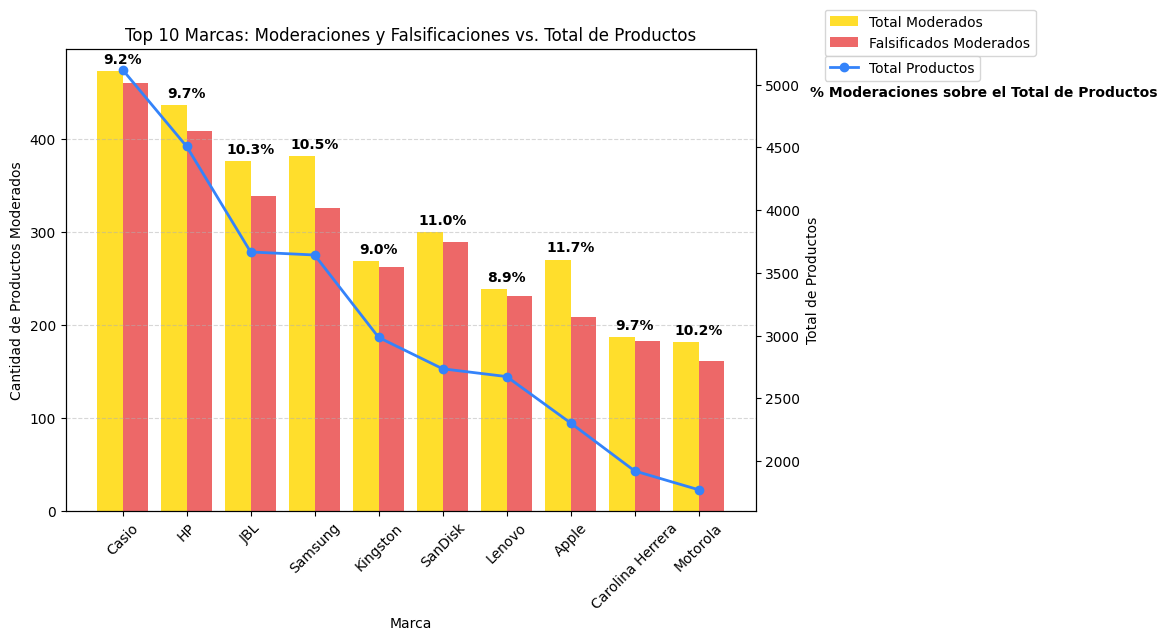

In [ ]:

marcas_moderadas = df.groupby("Marca").agg(
    Total_Productos=("Fake", "count"),
    Moderados=("Moderado", "sum"),
    Falsificados=("Fake", lambda x: sum(x & df.loc[x.index, "Moderado"]))
).sort_values(by="Total_Productos", ascending=False).head(10)


marcas_moderadas["% Moderados"] = (marcas_moderadas["Moderados"] / marcas_moderadas["Total_Productos"]) * 100


fig, ax1 = plt.subplots(figsize=(12, 6))
bar_width = 0.4
x = np.arange(len(marcas_moderadas.index))


ax1.bar(x - bar_width/2, marcas_moderadas["Moderados"], bar_width, color="#FFDB15", alpha=0.9, label="Total Moderados")
ax1.bar(x + bar_width/2, marcas_moderadas["Falsificados"], bar_width, color="#EB5757", alpha=0.9, label="Falsificados Moderados")
ax1.set_xlabel("Marca")
ax1.set_ylabel("Cantidad de Productos Moderados")
ax1.set_title("Top 10 Marcas: Moderaciones y Falsificaciones vs. Total de Productos")
ax1.set_xticks(x)
ax1.set_xticklabels(marcas_moderadas.index, rotation=45)
ax2 = ax1.twinx()
ax2.plot(x, marcas_moderadas["Total_Productos"], marker="o", linestyle="-", color="#3483FA", label="Total Productos", linewidth=2)
ax2.set_ylabel("Total de Productos")
ax1.legend(loc="upper left", bbox_to_anchor=(1.09, 1.1))
ax2.legend(loc="upper left", bbox_to_anchor=(1.09, 1))


for i in range(len(x)):
    porcentaje_moderado = marcas_moderadas["% Moderados"].iloc[i]
    ax1.text(x[i], marcas_moderadas["Moderados"].iloc[i] + 5, f"{porcentaje_moderado:.1f}%",
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')


plt.figtext(0.89, 0.8, "% Moderaciones sobre el Total de Productos", ha="center", fontsize=10, fontweight="bold", color="black")
ax1.grid(axis="y", linestyle="--", alpha=0.5)
plt.subplots_adjust(right=0.7)
plt.show()





- Casio y HP tienen los mayores volúmenes de moderación absoluta (más de 400 productos cada una), lo que indica que son marcas altamente vigiladas.
-El hecho de que las falsificaciones moderadas casi igualen a las moderaciones totales sugiere que la moderación está funcionando bien en estas marcas, identificando los productos correctos para revisión.
- Sin embargo, esto también puede significar que la moderación está actuando de manera reactiva y no preventiva, es decir, que la detección ocurre solo después de que un producto sospechoso ya ha sido publicado.
- Para marcas como Apple, Samsung y JBL el sistema de moderación podría estar aplicando reglas demasiado estrictas para estas marcas, marcando productos legítimos como sospechosos.
- Para marcas como Apple, Samsung y JBL los vendedores pueden estar usando estrategias que los hacen parecer más sospechosos (por ejemplo, precios bajos, descripciones genéricas, cambios de nombres sutiles).
-Los falsificadores en estas marcas (Apple, Samsung y JBL) pueden estar sofisticando sus métodos, usando imágenes originales, packaging realista y mejores tácticas para evitar ser detectados.

**Notas**

- Si se está moderando en exceso productos legítimos de Samsung, Apple y JBL, los vendedores auténticos pueden enfrentar problemas operativos, retrasos y pérdida de confianza en la plataforma.
- Si los falsificadores han encontrado formas de evadir la detección tras la moderación, esto significa que se necesita una actualización de los algoritmos de detección.
- Es posible que el modelo de detección actual haya sido entrenado con sesgos, detectando mejor falsificaciones de otras marcas mientras deja pasar algunas en Samsung, Apple y JBL.




### 1.2.11 Top 10 Marcas con mayor cantidad de Rollbacks

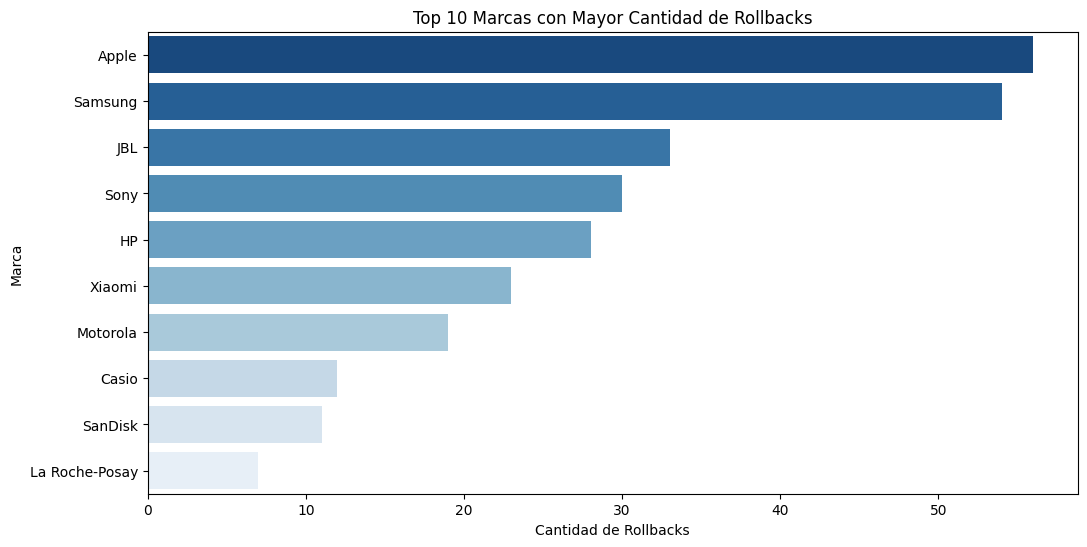

In [ ]:
rollback_por_marca = df.groupby("Marca")["Rollback"].sum().sort_values(ascending=False).head(10).reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(data=rollback_por_marca, x="Rollback", y="Marca", hue="Marca", dodge=False, palette="Blues_r", legend=False)


plt.xlabel("Cantidad de Rollbacks")
plt.ylabel("Marca")
plt.title("Top 10 Marcas con Mayor Cantidad de Rollbacks")
plt.show()


- Apple y Samsung lideran la lista de rollbacks, lo que indica que una gran cantidad de productos de estas marcas fueron moderados y luego revertidos.
- JBL, Sony y HP también presentan una cantidad considerable de rollbacks, aunque en menor medida que Apple y Samsung.
- Casio y SanDisk, que en análisis previos tenían una alta detección de falsificaciones, tienen menos rollbacks, lo que sugiere que la moderación en estas marcas es más efectiva.
- La Roche-Posay aparece en el ranking, lo que indica que incluso productos en la categoría de cosmética están experimentando reversión de moderaciones.

**En marcas con menos rollbacks (Casio, SanDisk), la moderación parece ser más precisa, lo que indica que el modelo de detección está funcionando mejor para ellas.**

- Sony no suele estar entre las marcas con más falsificaciones detectadas, lo que sugiere que sus moderaciones pueden estar generando falsos positivos.

### 1.2.12 Tasa de rollback vs Falsificaciones por marca

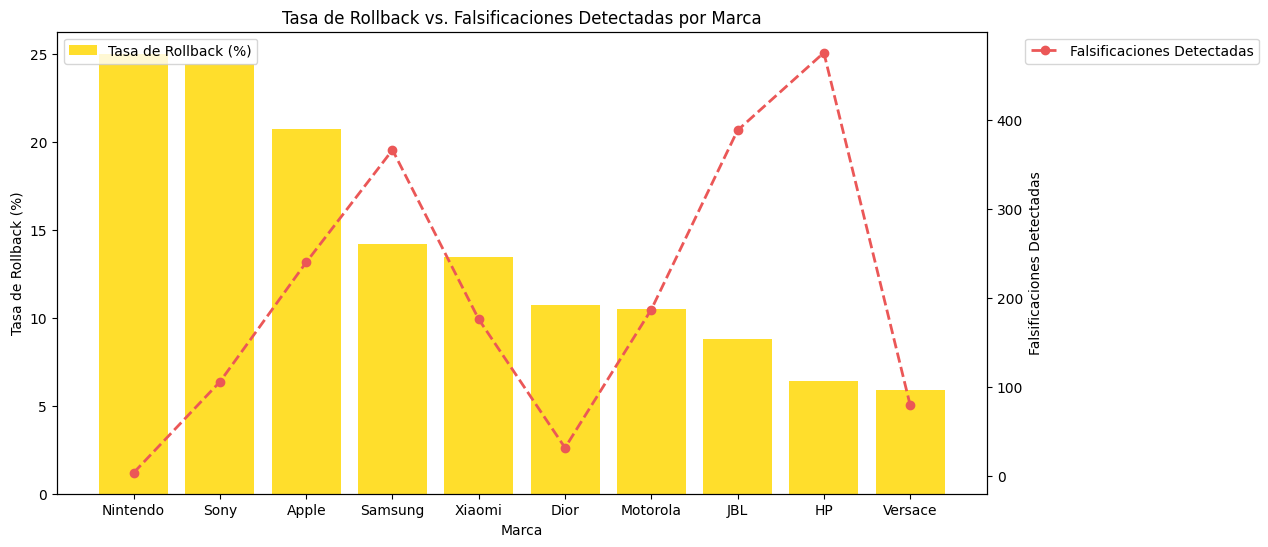

In [ ]:

# Calcular porcentaje de rollback sobre total de moderaciones
df["Rollback_Tasa"] = df["Rollback"] / df["Moderado"]
rollback_vs_falsificacion = df.groupby("Marca").agg(
    Rollback_Tasa=("Rollback_Tasa", "mean"),
    Falsificaciones=("Fake", "sum")
).sort_values(by="Rollback_Tasa", ascending=False).head(10)


fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(rollback_vs_falsificacion.index, rollback_vs_falsificacion["Rollback_Tasa"] * 100,
        color="#FFDB15", alpha=0.9, label="Tasa de Rollback (%)")

ax2 = ax1.twinx()
ax2.plot(rollback_vs_falsificacion.index, rollback_vs_falsificacion["Falsificaciones"],
         marker="o", linestyle="dashed", color="#EB5757", label="Falsificaciones Detectadas", linewidth=2)

# Etiquetas
ax1.set_xlabel("Marca")
ax1.set_ylabel("Tasa de Rollback (%)")
ax1.set_title("Tasa de Rollback vs. Falsificaciones Detectadas por Marca")
ax2.set_ylabel("Falsificaciones Detectadas")
ax1.legend(loc="upper left")

ax2.legend(loc="upper right", bbox_to_anchor=(1.3, 1))

plt.show()


- La moderación puede estar aplicándose de manera más estricta en Nintendo, Dior y Versace, generando falsos positivos que luego deben ser revertidos.

- Los vendedores de estas marcas pueden estar apelando activamente las moderaciones y logrando que sus productos sean restaurados.

- En marcas con baja tasa de rollback como HP y JBL, la moderación parece ser más precisa y efectiva.

- Versace tiene pocas falsificaciones detectadas pero una tasa de rollback relativamente baja (~5%), lo que sugiere que la moderación en esta marca está funcionando bien.

- Motorola tiene una tasa de rollback media (~10%), pero una cantidad elevada de falsificaciones detectadas.
-  La detección de falsificaciones en HP y JBL es más efectiva, por lo que hay menos necesidad de reversiones.
- Sony y Nintendo tienen altas tasas de rollback pero bajas falsificaciones detectadas, lo que sugiere que la moderación en estas marcas puede ser demasiado estricta y generar falsos positivos.

- A diferencia de otras marcas como Apple y Samsung, los vendedores de HP y JBL no apelan tanto sus moderaciones o las apelaciones no tienen éxito.


### 1.2.12 Vendedores con más rollback y falsificaciones detectadas

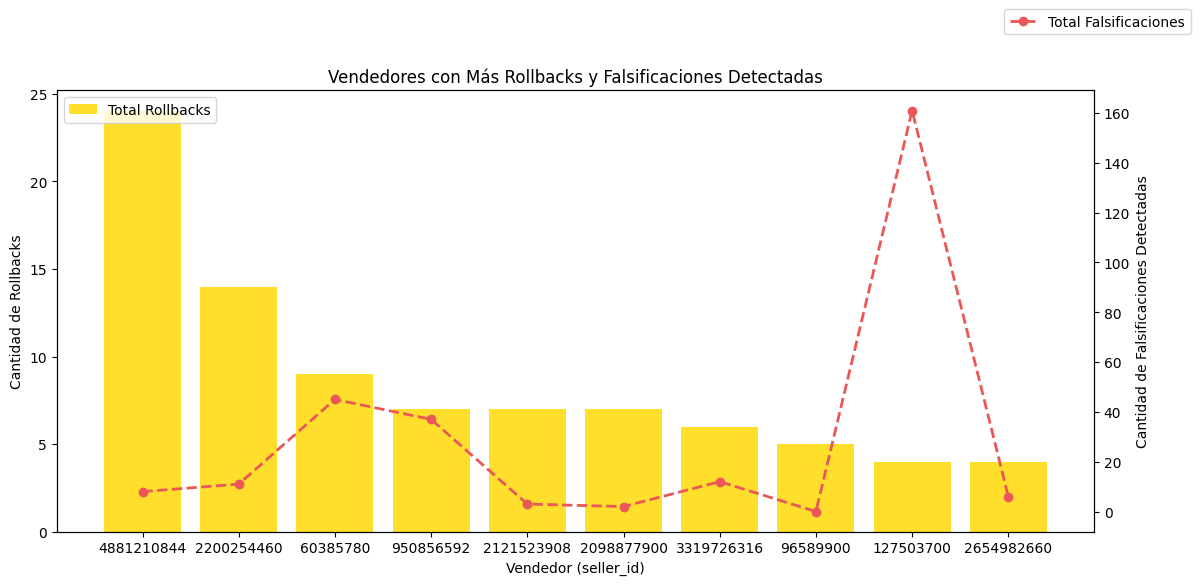

In [ ]:
vendedores_con_rollback = df.groupby("seller_id").agg(
    Total_Falsificados=("Fake", "sum"),
    Rollbacks=("Rollback", "sum")
).sort_values(by="Rollbacks", ascending=False).head(10)


fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(vendedores_con_rollback.index.astype(str), vendedores_con_rollback["Rollbacks"],
        color="#FFDB15", alpha=0.9, label="Total Rollbacks")

ax2 = ax1.twinx()
ax2.plot(vendedores_con_rollback.index.astype(str), vendedores_con_rollback["Total_Falsificados"],
         marker="o", linestyle="dashed", color="#EB5757", label="Total Falsificaciones", linewidth=2)


ax1.set_xlabel("Vendedor (seller_id)")
ax1.set_ylabel("Cantidad de Rollbacks")
ax1.set_title("Vendedores con Más Rollbacks y Falsificaciones Detectadas")
ax2.set_ylabel("Cantidad de Falsificaciones Detectadas")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right", bbox_to_anchor=(1.1, 1.2))


plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


- El vendedor con más rollbacks (4881210844) tiene más de 20 productos revertidos, pero relativamente pocas falsificaciones detectadas.
- El vendedor 127503700 tiene un pico extremadamente alto de falsificaciones detectadas (~150), pero no tiene tantos rollbacks comparado con otros.
- Algunos vendedores con muchos rollbacks (2200254460, 60385780, 95085692) también tienen un número considerable de falsificaciones detectadas, lo que sugiere que podrían estar apelando productos falsificados y obteniendo reversión de moderaciones.
- Vendedores como 96589900 tienen rollbacks moderados, pero pocas falsificaciones detectadas, lo que podría indicar moderaciones incorrectas.

# 1.2.13 Análisis por países

### 1.2.14 Distribución de Moderaciones y falsificaciones por país

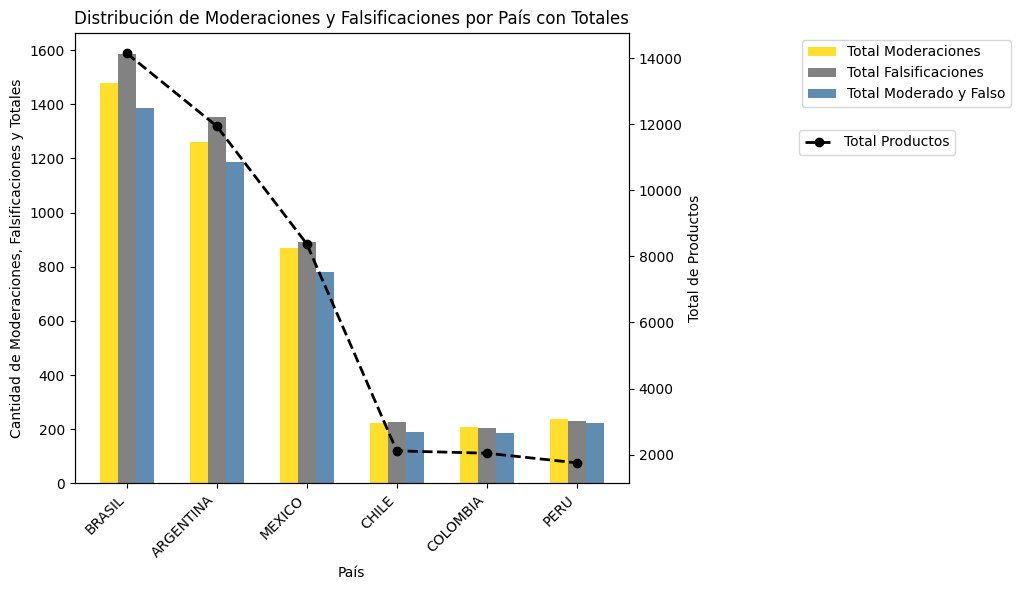

In [ ]:

df["Moderado"] = df["Moderado"].astype(int)
df["Fake"] = df["Fake"].astype(int)


df["Totales"] = ((df["Moderado"] == 1) & (df["Fake"] == 1)).astype(int)
distribucion_pais_top = df.groupby("site_id").agg(
    Total_Productos=("site_id", "count"),
    Total_Moderaciones=("Moderado", "sum"),
    Total_Falsificaciones=("Fake", "sum"),
    Total_Moderado_Falso=("Totales", "sum")
).sort_values(by="Total_Productos", ascending=False)


fig, ax1 = plt.subplots(figsize=(12, 6))

bar_width = 0.2
x = np.arange(len(distribucion_pais_top.index))

ax1.bar(x - bar_width, distribucion_pais_top["Total_Moderaciones"], bar_width, label="Total Moderaciones", color="#FFDB15", alpha=0.9)
ax1.bar(x, distribucion_pais_top["Total_Falsificaciones"], bar_width, label="Total Falsificaciones", color="#757575", alpha=0.9)
ax1.bar(x + bar_width, distribucion_pais_top["Total_Moderado_Falso"], bar_width, label="Total Moderado y Falso", color="#4d80a8", alpha=0.9)


ax2 = ax1.twinx()
ax2.plot(x, distribucion_pais_top["Total_Productos"], marker="o", linestyle="dashed", color="#000000", label="Total Productos", linewidth=2)


ax1.set_xlabel("País")
ax1.set_ylabel("Cantidad de Moderaciones, Falsificaciones y Totales")
ax1.set_title("Distribución de Moderaciones y Falsificaciones por País con Totales")
ax2.set_ylabel("Total de Productos")
ax1.set_xticks(x)
ax1.set_xticklabels(distribucion_pais_top.index, rotation=45, ha="right")
ax1.legend(loc="upper left",bbox_to_anchor=(1.3, 1))
ax2.legend(loc="upper right", bbox_to_anchor=(1.6, 0.8))
plt.tight_layout()
plt.show()







- Brasil y Argentina lideran tanto en moderaciones como en falsificaciones.

- Brasil: 1.479 moderaciones y 1.585 falsificaciones.
- Argentina: 1.262 moderaciones y 1.352 falsificaciones.
Esto indica que en estos países se detectan muchas falsificaciones, pero también hay mucha actividad de moderación, lo que sugiere un mayor control del mercado.

- México sigue la misma tendencia, aunque con cifras más bajas.
870 moderaciones y 892 falsificaciones.
La proporción sigue siendo alta, lo que sugiere que la detección de productos falsos es similar a la cantidad de moderaciones.
- Chile, Colombia y Perú tienen cifras mucho menores en volumen de moderaciones y falsificaciones.

Sin embargo, la relación entre moderaciones y falsificaciones sigue siendo muy cercana.
Esto podría indicar que en estos países se están detectando casi todas las falsificaciones, pero con un menor volumen de productos en general.

### Analizando el % de moderaciones sobre el total de productos, encontramos:

- Perú lidera con 13,5% de moderaciones, lo que sugiere una mayor intervención en los productos listados.
- Chile (10,4%) y Argentina (10,6%) también tienen un alto porcentaje de moderaciones.
- Brasil (10,4%) y México (10,4%) están en niveles similares.
- Colombia es el país con menos moderaciones en proporción a los productos (10,2%).

Esto indica que en Perú hay un mayor control sobre los productos listados, mientras que en Colombia el porcentaje de moderaciones es menor.

**Si analizamos el % de falsificaciones sobre el total de productos:**

- Brasil (11,2%) y Argentina (11,3%) tienen el mayor porcentaje de falsificaciones.
- México (10,6%) sigue la tendencia, aunque ligeramente más bajo.
- Perú (13,1%) también muestra un alto porcentaje de falsificaciones.
- Colombia (10,0%) y Chile (10,6%) tienen el menor porcentaje relativo.

Este análisis muestra que en Brasil y Argentina hay una gran cantidad de falsificaciones en proporción al total de productos, lo que podría ser un problema de volumen o un mercado más atractivo para falsificadores.

**Tasa de Falsificaciones dentro de Moderaciones (%) = (Total de Falsificaciones Moderadas / Total de Moderaciones) * 100**

- Chile (85,5%) y Perú (92,8%) tienen las tasas más altas.

Esto sugiere que casi todas las moderaciones en estos países terminan en falsificaciones.
- Brasil (93,8%), Argentina (94,0%) y México (89,8%) también tienen valores altos.
Indica que las moderaciones son bastante efectivas en detectar falsificaciones.
-Colombia tiene la tasa más baja con 89,4%.

**Podría haber más moderaciones que no detectan productos falsos.
En la mayoría de los países, más del 85% de los productos moderados terminan siendo falsificaciones, lo que sugiere un proceso de moderación eficiente.**

### 1.2.15 Distribución de vendedores por país: Total productos, falsificadores y moderados

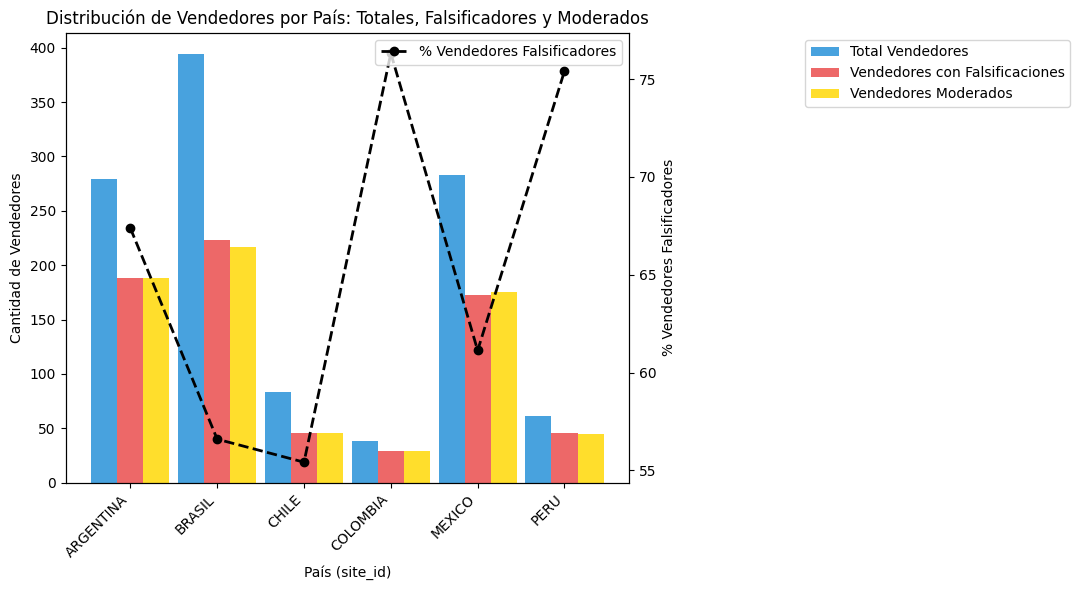

In [264]:

vendedores_pais = df.groupby("site_id").agg(
    Total_Vendedores=("seller_id", "nunique"),
    Vendedores_Falsificadores=("seller_id", lambda x: x[df.loc[x.index, "Fake"] == 1].nunique()),
    Vendedores_Moderados=("seller_id", lambda x: x[df.loc[x.index, "Moderado"] == 1].nunique())
).reset_index()


vendedores_pais["% Vendedores Falsificadores"] = (vendedores_pais["Vendedores_Falsificadores"] / vendedores_pais["Total_Vendedores"]) * 100
fig, ax1 = plt.subplots(figsize=(12, 6))

bar_width = 0.3
x = np.arange(len(vendedores_pais["site_id"]))
ax1.bar(x - bar_width, vendedores_pais["Total_Vendedores"], bar_width, label="Total Vendedores", color="#3498DB", alpha=0.9)
ax1.bar(x, vendedores_pais["Vendedores_Falsificadores"], bar_width, label="Vendedores con Falsificaciones", color="#EB5757", alpha=0.9)
ax1.bar(x + bar_width, vendedores_pais["Vendedores_Moderados"], bar_width, label="Vendedores Moderados", color="#FFDB15", alpha=0.9)

ax2 = ax1.twinx()
ax2.plot(x, vendedores_pais["% Vendedores Falsificadores"], marker="o", linestyle="dashed", color="black", label="% Vendedores Falsificadores", linewidth=2)
ax1.set_xlabel("País (site_id)")
ax1.set_ylabel("Cantidad de Vendedores")
ax1.set_title("Distribución de Vendedores por País: Totales, Falsificadores y Moderados")
ax2.set_ylabel("% Vendedores Falsificadores")


ax1.set_xticks(x)
ax1.set_xticklabels(vendedores_pais["site_id"], rotation=45, ha="right")
ax1.legend(loc="upper left",bbox_to_anchor=(1.3, 1))
ax2.legend(loc="upper right")
plt.tight_layout()
plt.show()





In [266]:
vendedores_pais

,site_id,Total_Vendedores,Vendedores_Falsificadores,Vendedores_Moderados,% Vendedores Falsificadores
0,ARGENTINA,279,188,188,67.38
1,BRASIL,394,223,217,56.60
2,CHILE,83,46,46,55.42
3,COLOMBIA,38,29,29,76.32
4,MEXICO,283,173,175,61.13
5,PERU,61,46,45,75.41


- Brasil tiene la mayor cantidad de vendedores en total (394), seguido de México (283) y Argentina (279).
- Brasil también tiene la mayor cantidad absoluta de vendedores con falsificaciones (223).
- Colombia y Perú tienen pocos vendedores en total, pero un alto porcentaje de ellos ha vendido productos falsificados.

###Si analizamos el % de vendedores con falsificaciones sobre el total en cada país:

- Colombia (76.3%) y Perú (75.4%) tienen la mayor proporción de vendedores que han vendido productos falsos.
Esto indica que en estos países la probabilidad de que un vendedor esté involucrado en falsificaciones es alta.
-Argentina (67.4%) y México (61.1%) también presentan un problema significativo, con más del 60% de sus vendedores en esta situación.
-Brasil (56.6%) y Chile (55.4%) tienen la menor proporción de falsificadores en relación con su total de vendedores, aunque sigue siendo preocupante.

En todos los países, la cantidad de vendedores moderados es similar a la cantidad de vendedores con falsificaciones.
Esto sugiere que la moderación está funcionando bien para identificar vendedores problemáticos.
Brasil y México tienen ligeras diferencias entre moderaciones y falsificaciones, lo que puede indicar que hay vendedores que han sido moderados sin haber vendido productos falsos.

### 1.2.16 Top 10 Categorias con más vendedores con productos falsificados por país

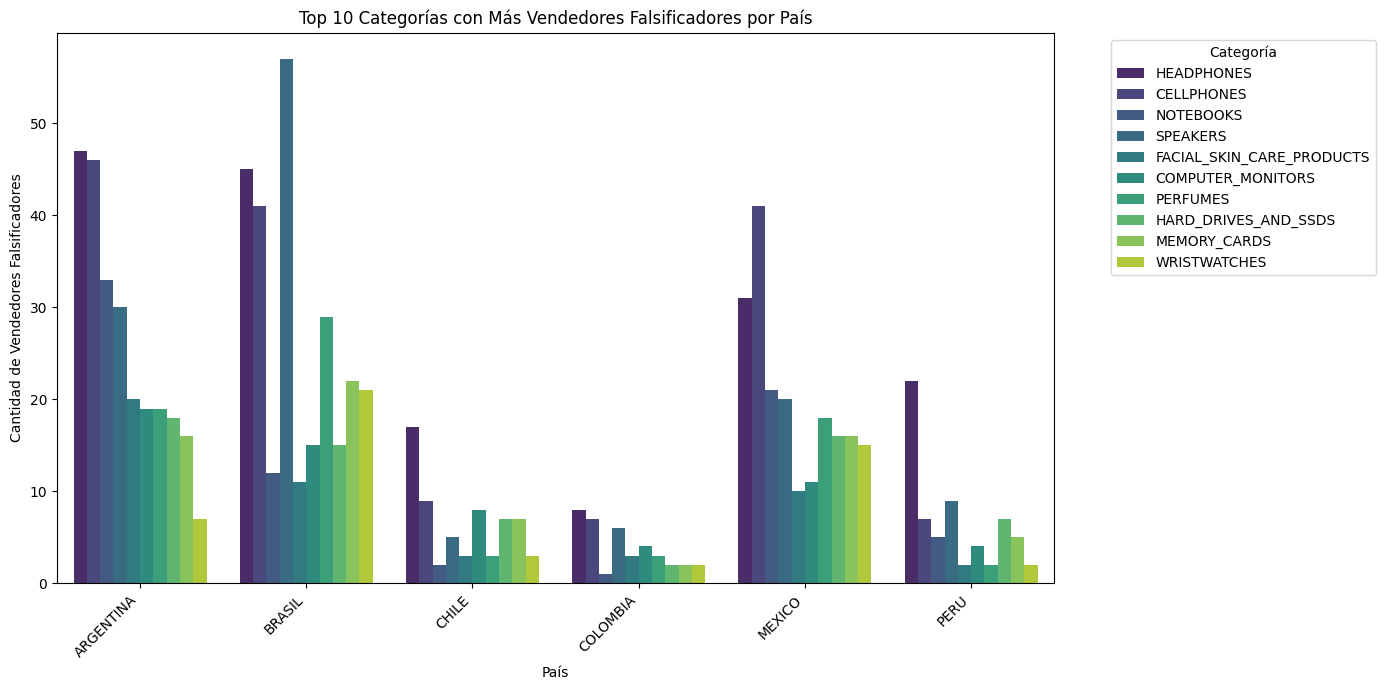

In [301]:
# Agrupar por país y categoría para ver la cantidad de vendedores con falsificaciones
categoria_pais_falsificaciones = df[df["Fake"] == 1].groupby(["site_id", "Dominio_normalizado"]).agg(
    Vendedores_Falsificadores=("seller_id", "nunique"),
    Total_Productos_Falsificados=("Fake", "sum")
).reset_index()

# Ordenar por país y cantidad de vendedores falsificadores
categoria_pais_falsificaciones = categoria_pais_falsificaciones.sort_values(
    by=["site_id", "Vendedores_Falsificadores"], ascending=[True, False]
)

top_categorias = categoria_pais_falsificaciones.groupby("Dominio_normalizado")["Vendedores_Falsificadores"].sum().nlargest(10).index


df_top_categorias = categoria_pais_falsificaciones[categoria_pais_falsificaciones["Dominio_normalizado"].isin(top_categorias)]
plt.figure(figsize=(14, 7))
sns.barplot(
    data=df_top_categorias,
    x="site_id",
    y="Vendedores_Falsificadores",
    hue="Dominio_normalizado",
    palette="viridis"
)

plt.xlabel("País")
plt.ylabel("Cantidad de Vendedores Falsificadores")
plt.title("Top 10 Categorías con Más Vendedores Falsificadores por País")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




- Brasil, Argentina y México son los países con la mayor cantidad de vendedores falsificadores, lo que indica que estos mercados tienen una alta presencia de productos sospechosos.
- Chile, Colombia y Perú muestran una menor cantidad de vendedores falsificadores en comparación con los tres países anteriores, lo que sugiere que la presencia de productos falsificados es más controlada o menos común.
Categorías más afectadas:

- CELLPHONES, HEADPHONES y NOTEBOOKS son las categorías con la mayor cantidad de vendedores involucrados en falsificaciones en todos los países.
- SPEAKERS, PERFUMES y MEMORY_CARDS también presentan una alta cantidad de vendedores falsificadores, aunque con menor incidencia en comparación con las primeras tres categorías.
- FAICAL_SKIN_CARE_PRODUCTS y COMPUTER_MONITORS aparecen en menor cantidad, lo que indica que la falsificación en estas categorías es menos frecuente.
Variabilidad entre países:

- En Brasil, los vendedores falsificadores están más concentrados en categorías como SPEAKERS, CELLPHONES y NOTEBOOKS, lo que indica que estas categorías podrían tener una demanda alta o un control menos estricto.
- En Argentina y México, la distribución es más homogénea, pero sigue existiendo una fuerte presencia en CELLPHONES y HEADPHONES.
- En Colombia y Perú, aunque la cantidad de vendedores falsificadores es menor, se observa que HEADPHONES y MEMORY_CARDS tienen un impacto relativamente alto en relación con el total de vendedores falsificadores.

### 1.2.17 Top 10 Categorias con más vendedores con productos falsificados

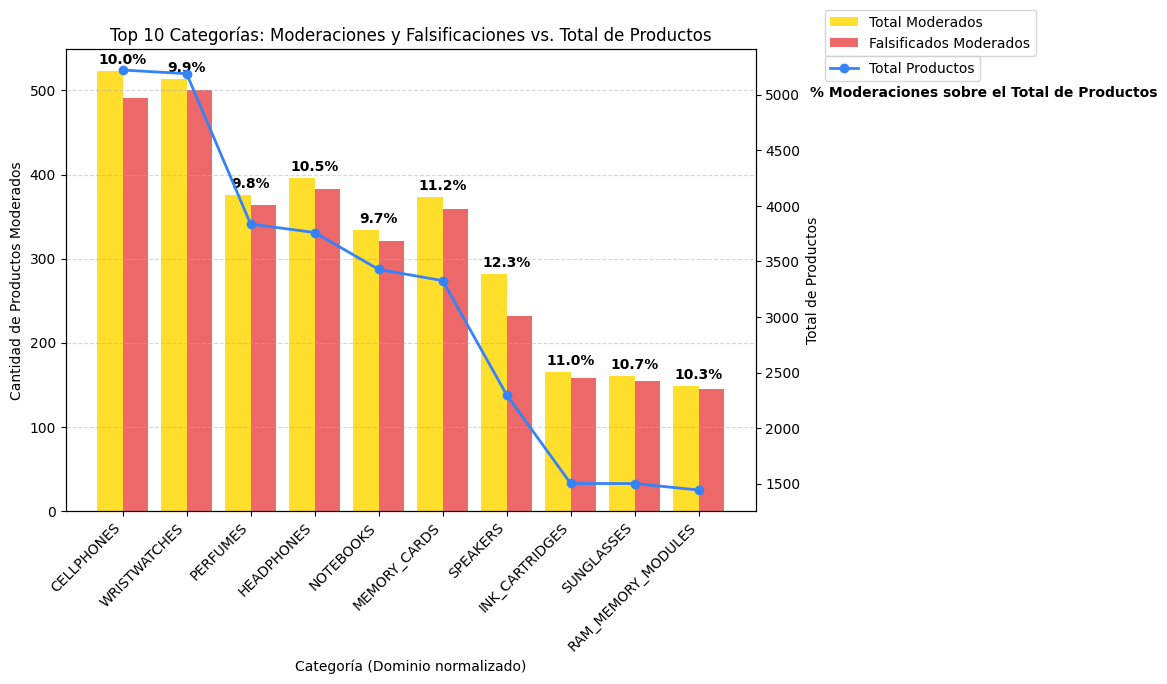

In [281]:

categorias_moderadas = df.groupby("Dominio_normalizado").agg(
    Total_Productos=("Fake", "count"),
    Moderados=("Moderado", "sum"),
    Falsificados=("Fake", lambda x: sum(x & df.loc[x.index, "Moderado"]))
).sort_values(by="Total_Productos", ascending=False).head(10)


categorias_moderadas["% Moderados"] = (categorias_moderadas["Moderados"] / categorias_moderadas["Total_Productos"]) * 100


fig, ax1 = plt.subplots(figsize=(12, 6))
bar_width = 0.4
x = np.arange(len(categorias_moderadas.index))


ax1.bar(x - bar_width/2, categorias_moderadas["Moderados"], bar_width, color="#FFDB15", alpha=0.9, label="Total Moderados")
ax1.bar(x + bar_width/2, categorias_moderadas["Falsificados"], bar_width, color="#EB5757", alpha=0.9, label="Falsificados Moderados")
ax1.set_xlabel("Categoría (Dominio normalizado)")
ax1.set_ylabel("Cantidad de Productos Moderados")
ax1.set_title("Top 10 Categorías: Moderaciones y Falsificaciones vs. Total de Productos")
ax1.set_xticks(x)
ax1.set_xticklabels(categorias_moderadas.index, rotation=45, ha="right")


ax2 = ax1.twinx()
ax2.plot(x, categorias_moderadas["Total_Productos"], marker="o", linestyle="-", color="#3483FA", label="Total Productos", linewidth=2)
ax2.set_ylabel("Total de Productos")
ax1.legend(loc="upper left", bbox_to_anchor=(1.09, 1.1))
ax2.legend(loc="upper left", bbox_to_anchor=(1.09, 1))
for i in range(len(x)):
    porcentaje_moderado = categorias_moderadas["% Moderados"].iloc[i]
    ax1.text(x[i], categorias_moderadas["Moderados"].iloc[i] + 5, f"{porcentaje_moderado:.1f}%",
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')


plt.figtext(0.89, 0.8, "% Moderaciones sobre el Total de Productos", ha="center", fontsize=10, fontweight="bold", color="black")


ax1.grid(axis="y", linestyle="--", alpha=0.5)


plt.subplots_adjust(right=0.7)
plt.show()





### 1.2.18 Reglas de atribución a la falsificación

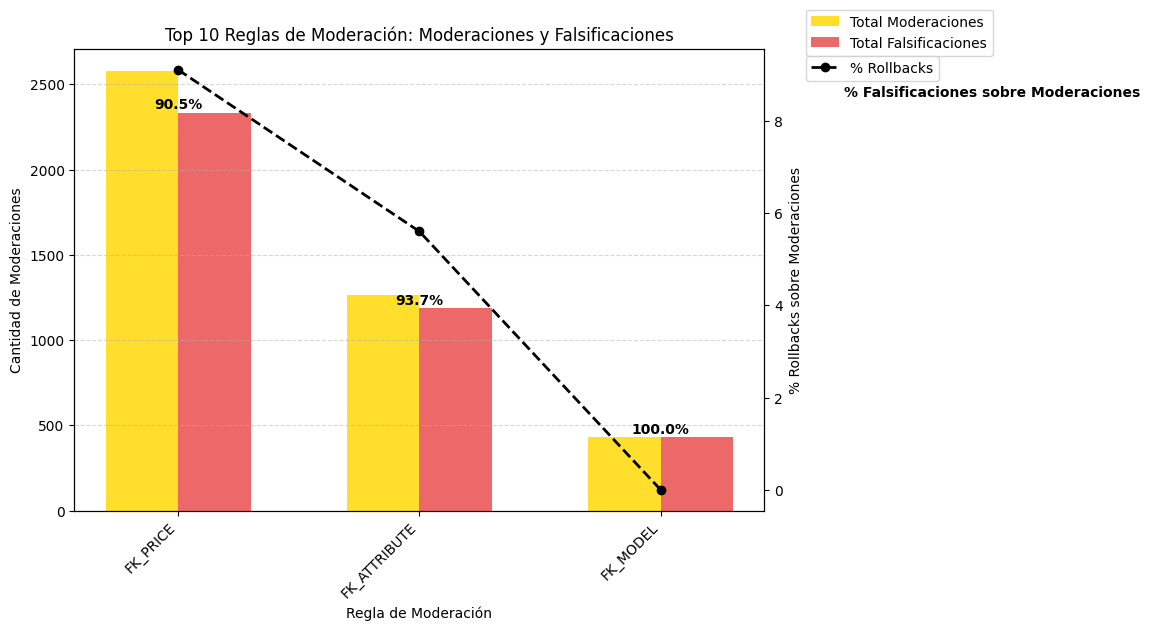

In [285]:

reglas_moderacion = df.groupby("Rule").agg(
    Total_Moderaciones=("Moderado", "sum"),
    Total_Falsificaciones=("Fake", "sum"),
    Total_Rollbacks=("Rollback", "sum")
).sort_values(by="Total_Moderaciones", ascending=False).head(3)


reglas_moderacion["% Falsificaciones"] = (reglas_moderacion["Total_Falsificaciones"] / reglas_moderacion["Total_Moderaciones"]) * 100

reglas_moderacion["% Rollbacks"] = (reglas_moderacion["Total_Rollbacks"] / reglas_moderacion["Total_Moderaciones"]) * 100
fig, ax1 = plt.subplots(figsize=(12, 6))
bar_width = 0.3
x = np.arange(len(reglas_moderacion.index))
ax1.bar(x - bar_width/2, reglas_moderacion["Total_Moderaciones"], bar_width, color="#FFDB15", alpha=0.9, label="Total Moderaciones")
ax1.bar(x + bar_width/2, reglas_moderacion["Total_Falsificaciones"], bar_width, color="#EB5757", alpha=0.9, label="Total Falsificaciones")


ax1.set_xlabel("Regla de Moderación")
ax1.set_ylabel("Cantidad de Moderaciones")
ax1.set_title("Top 10 Reglas de Moderación: Moderaciones y Falsificaciones")
ax1.set_xticks(x)
ax1.set_xticklabels(reglas_moderacion.index, rotation=45, ha="right")
ax2 = ax1.twinx()
ax2.plot(x, reglas_moderacion["% Rollbacks"], marker="o", linestyle="dashed", color="black", label="% Rollbacks", linewidth=2)
ax2.set_ylabel("% Rollbacks sobre Moderaciones")


ax1.legend(loc="upper left", bbox_to_anchor=(1.05, 1.1))
ax2.legend(loc="upper left", bbox_to_anchor=(1.05, 1))


for i in range(len(x)):
    porcentaje_falsif = reglas_moderacion["% Falsificaciones"].iloc[i]
    ax1.text(x[i], reglas_moderacion["Total_Falsificaciones"].iloc[i] + 5, f"{porcentaje_falsif:.1f}%",
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')


plt.figtext(0.89, 0.8, "% Falsificaciones sobre Moderaciones", ha="center", fontsize=10, fontweight="bold", color="black")
ax1.grid(axis="y", linestyle="--", alpha=0.5)
plt.subplots_adjust(right=0.7)
plt.show()




- La mayoría de las moderaciones provienen de la regla FK_PRICE, con más de 2,500 moderaciones.

- El 90.5% de estas moderaciones fueron confirmadas como falsificaciones.
Esto indica que la regla FK_PRICE es altamente efectiva en la detección de productos falsificados.
- La regla FK_ATTRIBUTE también tiene una tasa de falsificación alta (93.7%), pero con un menor volumen de moderaciones.Es posible que esta regla esté actuando sobre productos con características específicas y no de forma masiva como FK_PRICE.

- La regla FK_MODEL tiene un 100% de falsificaciones confirmadas, pero con un volumen muy bajo de moderaciones.Esto sugiere que podría ser una regla más restrictiva, activándose en casos muy específicos.
Sin embargo, su precisión parece ser la mejor de las tres reglas analizadas.
-Los rollbacks son bajos para todas las reglas, con un máximo de menos del 10% en FK_PRICE.Esto indica que la moderación está siendo efectiva y que pocas moderaciones están siendo revertidas por Atención al Cliente.
Las reglas FK_ATTRIBUTE y FK_MODEL prácticamente no tienen rollbacks, lo que refuerza su precisión.


### 1.2.19 Moderaciones y falsificaciones por regla por cada país

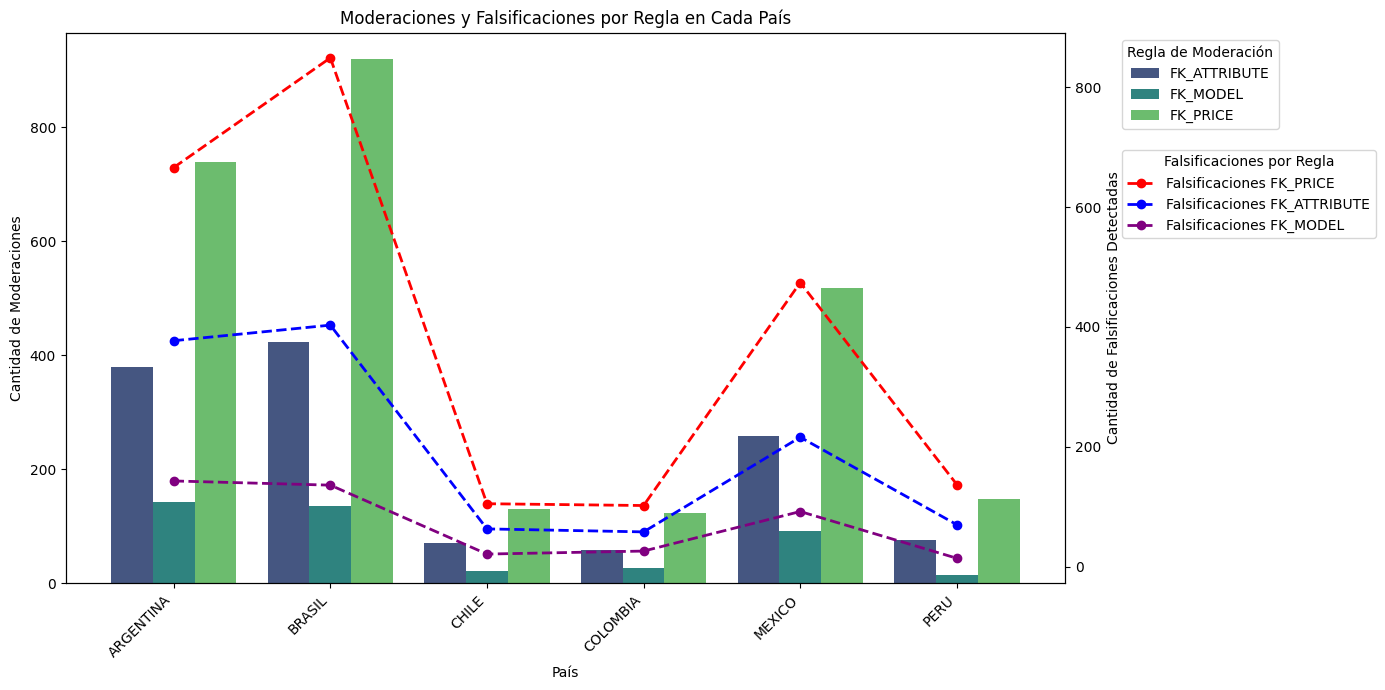

In [304]:
reglas_por_pais = df.groupby(["site_id", "Rule"]).agg(
    Total_Moderaciones=("Moderado", "sum"),
    Total_Falsificaciones=("Fake", "sum")
).reset_index()

reglas_top = ["FK_PRICE", "FK_ATTRIBUTE", "FK_MODEL"]
reglas_por_pais = reglas_por_pais[reglas_por_pais["Rule"].isin(reglas_top)]

# Obtener el orden correcto de los países
paises_ordenados = reglas_por_pais["site_id"].unique()


fig, ax1 = plt.subplots(figsize=(14, 7))
sns.barplot(
    data=reglas_por_pais,
    x="site_id",
    y="Total_Moderaciones",
    hue="Rule",
    palette="viridis",
    ax=ax1
)


ax1.set_xlabel("País")
ax1.set_ylabel("Cantidad de Moderaciones")
ax1.set_title("Moderaciones y Falsificaciones por Regla en Cada País")

# Asegurar que los ticks en el eje X coincidan con las etiquetas
ax1.set_xticks(np.arange(len(paises_ordenados)))
ax1.set_xticklabels(paises_ordenados, rotation=45, ha="right")


ax2 = ax1.twinx()
colores_reglas = {"FK_PRICE": "red", "FK_ATTRIBUTE": "blue", "FK_MODEL": "purple"}
for regla in reglas_top:
    datos_regla = reglas_por_pais[reglas_por_pais["Rule"] == regla]
    ax2.plot(
        np.arange(len(datos_regla["site_id"])), datos_regla["Total_Falsificaciones"],
        marker="o", linestyle="dashed", color=colores_reglas[regla],
        label=f"Falsificaciones {regla}", linewidth=2
    )


ax2.set_ylabel("Cantidad de Falsificaciones Detectadas")


ax1.legend(title="Regla de Moderación", bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.legend(title="Falsificaciones por Regla", bbox_to_anchor=(1.05, 0.8), loc='upper left')
plt.tight_layout()
plt.show()



### 1.2.20 Moderaciones y falsificaciones por regla por cada categoria

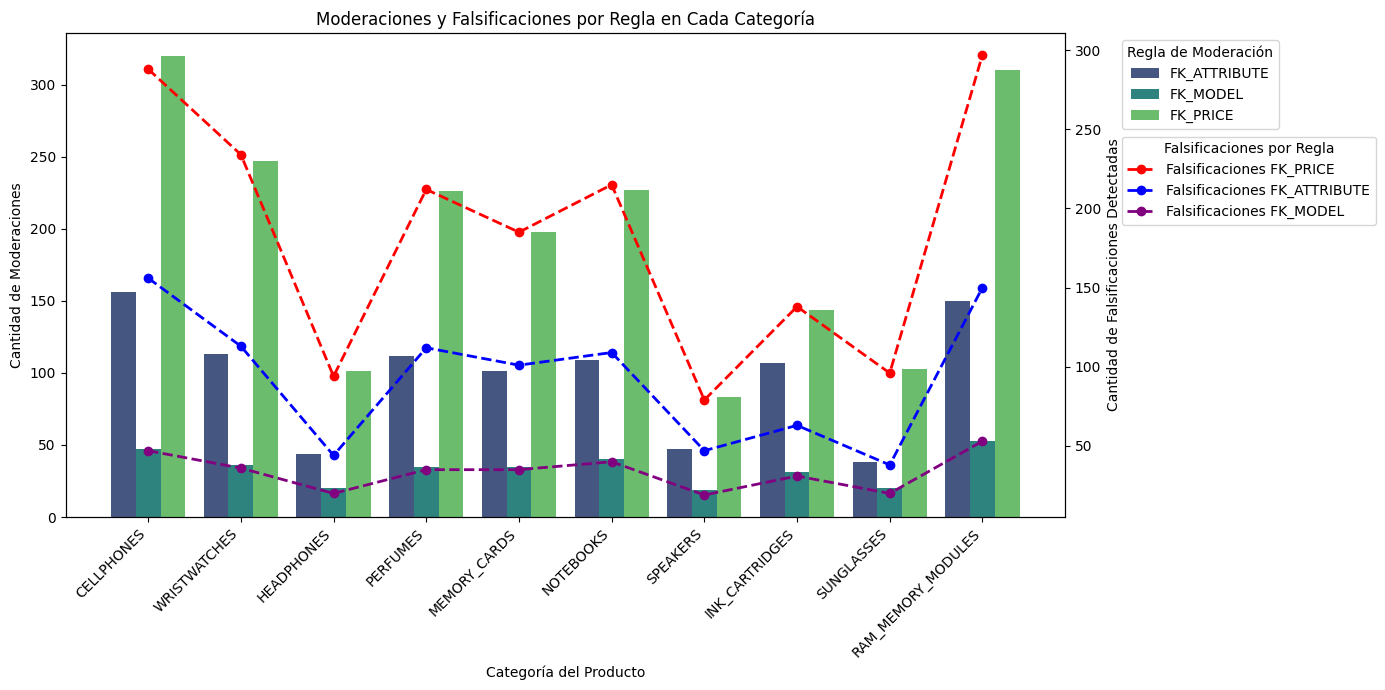

In [305]:


reglas_por_categoria = df.groupby(["Dominio_normalizado", "Rule"]).agg(
    Total_Moderaciones=("Moderado", "sum"),
    Total_Falsificaciones=("Fake", "sum")
).reset_index()

reglas_top = ["FK_PRICE", "FK_ATTRIBUTE", "FK_MODEL"]
reglas_por_categoria = reglas_por_categoria[reglas_por_categoria["Rule"].isin(reglas_top)]

# Seleccionar las 10 categorías con más moderaciones
top_categorias = reglas_por_categoria.groupby("Dominio_normalizado")["Total_Moderaciones"].sum().nlargest(10).index
reglas_por_categoria = reglas_por_categoria[reglas_por_categoria["Dominio_normalizado"].isin(top_categorias)]


fig, ax1 = plt.subplots(figsize=(14, 7))
sns.barplot(
    data=reglas_por_categoria,
    x="Dominio_normalizado",
    y="Total_Moderaciones",
    hue="Rule",
    palette="viridis",
    ax=ax1
)

ax1.set_xlabel("Categoría del Producto")
ax1.set_ylabel("Cantidad de Moderaciones")
ax1.set_title("Moderaciones y Falsificaciones por Regla en Cada Categoría")


ax1.set_xticks(np.arange(len(top_categorias)))
ax1.set_xticklabels(top_categorias, rotation=45, ha="right")


ax2 = ax1.twinx()
colores_reglas = {"FK_PRICE": "red", "FK_ATTRIBUTE": "blue", "FK_MODEL": "purple"}


for regla in reglas_top:
    datos_regla = reglas_por_categoria[reglas_por_categoria["Rule"] == regla]
    ax2.plot(
        np.arange(len(datos_regla["Dominio_normalizado"])), datos_regla["Total_Falsificaciones"],
        marker="o", linestyle="dashed", color=colores_reglas[regla],
        label=f"Falsificaciones {regla}", linewidth=2
    )


ax2.set_ylabel("Cantidad de Falsificaciones Detectadas")


ax1.legend(title="Regla de Moderación", bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.legend(title="Falsificaciones por Regla", bbox_to_anchor=(1.05, 0.8), loc='upper left')
plt.tight_layout()
plt.show()


- FK_PRICE es la regla dominante en la mayoría de las categorías, lo que indica que los precios son un factor clave en la detección de posibles falsificaciones.
- FK_ATTRIBUTE tiene una alta tasa de falsificación detectada (100% en la mayoría de los casos), lo que sugiere que si un producto se modera por atributos, es muy probable que termine siendo falso.
- FK_MODEL es la regla menos aplicada en general, lo que indica que el modelo de Machine Learning tiene menos intervenciones en comparación con reglas basadas en atributos o precios


### CELLPHONES
- 320 moderaciones con FK_PRICE → 288 (90%) resultaron falsos.
FK_ATTRIBUTE y FK_MODEL tienen 100% de falsificación detectada.

Interpretación: Los celulares falsificados suelen ser identificados por su precio, pero cuando entran por atributos o el modelo de ML, la detección de falsificación es total.
###HEADPHONES
- FK_PRICE (247 moderaciones, 234 falsificaciones - 94.7%) es la regla más utilizada.
- FK_ATTRIBUTE y FK_MODEL también tienen una alta tasa de falsificación (100%).

Interpretación: La falsificación de auriculares es común y, como en los celulares, el precio es un indicador clave.
### INK_CARTRIDGES
- FK_PRICE (101 moderaciones, 94 falsificaciones - 93%) lidera las detecciones.
- FK_ATTRIBUTE y FK_MODEL también identifican 100% de los casos como falsificaciones.

Interpretación: Los cartuchos de tinta falsificados son detectados principalmente por precio, pero cuando la moderación ocurre por atributos o modelo, es casi seguro que sean falsos.
### MEMORY_CARDS
- FK_PRICE (226 moderaciones, 212 falsificaciones - 93.8%) es la regla dominante.
- FK_ATTRIBUTE y FK_MODEL identifican el 100% de los casos como falsificados.

Interpretación: Las tarjetas de memoria falsas son fácilmente detectadas por atributos o modelo, pero el precio sigue siendo clave.
### NOTEBOOKS
- FK_PRICE (198 moderaciones, 185 falsificaciones - 93.4%) es la regla principal.
- FK_ATTRIBUTE y FK_MODEL detectan el 100% de los casos como falsos.

Interpretación: Los portátiles falsificados también tienen alta detección por atributos y modelo.
### PERFUMES
- FK_PRICE (227 moderaciones, 215 falsificaciones - 94.7%)
- FK_ATTRIBUTE y FK_MODEL tienen falsificación detectada del 100%.

Interpretación: Los perfumes falsificados son muy fáciles de identificar cuando entran por atributos o por el modelo de ML.
### RAM MEMORY MODULES
- FK_PRICE (83 moderaciones, 79 falsificaciones - 95%)
- FK_ATTRIBUTE y FK_MODEL tienen falsificación detectada del 100%.

Interpretación: Esta categoría puede ser un nuevo objetivo para falsificaciones.
### SPEAKERS
- FK_PRICE (144 moderaciones, 138 falsificaciones - 95.8%)
- FK_ATTRIBUTE tiene menos detecciones (107 moderaciones, 63 falsificaciones - 58.8%).

Interpretación: A diferencia de otras categorías, aquí la regla FK_ATTRIBUTE no es tan precisa en detectar falsificaciones.
### SUNGLASSES
- FK_PRICE (103 moderaciones, 96 falsificaciones - 93.2%)
- FK_ATTRIBUTE y FK_MODEL tienen falsificación detectada del 100%.

Interpretación: Como los perfumes, los lentes de sol son productos con alta tasa de falsificación.
### WRISTWATCHES
- FK_PRICE (310 moderaciones, 297 falsificaciones - 95.8%)
- FK_ATTRIBUTE y FK_MODEL detectan el 100% de los casos como falsos.

Interpretación: Los relojes falsificados son identificados principalmente por precio, pero cuando se moderan por atributos o modelo, se confirman como falsificaciones en todos los casos.

# 2. Conclusiones Finales del Análisis de Falsificaciones y Moderaciones

##  **Análisis por Precio**
- Los productos falsificados tienden a tener un **precio significativamente menor** que los productos legítimos en la mayoría de los países.
- Se observa que en algunos casos hay productos falsificados con **precios similares o incluso mayores** que los legítimos, lo que puede indicar estrategias de engaño hacia los compradores.
- Los vendedores con más productos falsificados **tienden a ofrecer productos a precios más bajos**, pero hay excepciones donde algunos vendedores intentan imitar precios de productos legítimos.

## **Análisis por Marca**
- **SanDisk, HP, JBL, Samsung y Kingston** son las marcas con mayor cantidad de moderaciones y falsificaciones.
- Marcas como **Samsung, JBL y Apple** tienen **altos niveles de moderaciones**, pero una proporción menor de falsificaciones reales, lo que sugiere una alta tasa de **falsos positivos** en los modelos de detección.
- **Casio y SanDisk**, por otro lado, tienen niveles moderados de moderaciones pero con un porcentaje alto de falsificaciones reales.

##  **Análisis por País**
- **Brasil, Argentina y México** lideran en cantidad de productos moderados y falsificados, lo que indica un **mayor volumen de productos sospechosos en estos mercados**.
- En **Chile, Colombia y Perú**, la cantidad de productos moderados y falsificados es menor, lo que puede deberse a un mercado más controlado o con menor volumen de productos.
- El porcentaje de productos que fueron moderados y resultaron ser falsificaciones es **alto en todos los países**, con Brasil y Argentina destacándose.

##  **Análisis de Vendedores**
- **Brasil es el país con más vendedores únicos**, seguido de Argentina y México.
- **Entre el 55% y el 76% de los vendedores en cada país han vendido al menos un producto falsificado**, lo que indica que la falsificación no está limitada a un pequeño grupo de vendedores.
- No hay vendedores que operen en **más de dos países**, lo que sugiere que la falsificación es mayormente **localizada en cada mercado**.

##  **Análisis por Categoría de Producto**
- **CELLPHONES, HEADPHONES y NOTEBOOKS** son las categorías más afectadas por la falsificación en todos los países.
- **SPEAKERS, PERFUMES y MEMORY_CARDS** también presentan una alta cantidad de falsificaciones, lo que indica que la falsificación no es exclusiva de la tecnología.
- La falsificación de **productos de belleza** es menos frecuente en comparación con dispositivos electrónicos.

##  **Análisis de Reglas de Moderación**
- **FK_PRICE, FK_ATTRIBUTE y FK_MODEL** son las reglas más utilizadas para moderar productos.
- La regla **FK_PRICE** es la que más productos falsificados ha detectado, lo que sugiere que el **precio es un indicador clave en la detección de falsificaciones**.
- La regla **FK_MODEL** tiene la tasa más alta de falsificaciones detectadas entre los productos moderados, lo que indica que es una de las más eficientes para detectar productos falsos.

##  **Análisis de Rollbacks (Reversiones de Moderación)**
- Marcas como **HP y JBL** tienen altos niveles de falsificaciones pero también altos niveles de rollbacks, lo que sugiere que algunos productos pueden ser falsificados pero igualmente ser aprobados tras una apelación.
- **Sony y Nintendo tienen tasas de rollback altas**, aunque con un número menor de falsificaciones detectadas.
- En términos de vendedores, algunos con **altas tasas de falsificaciones han logrado apelar y recuperar sus productos moderados**.

#  **Recomendaciones Finales**
**Refinar las reglas de moderación**, especialmente en productos electrónicos donde hay altos niveles de falsificaciones reales.  
**Enfocar esfuerzos en mercados con mayor incidencia de falsificaciones**, como Brasil, Argentina y México.  
**Analizar las políticas de rollback**, ya que algunos vendedores pueden estar logrando recuperar productos falsificados tras una moderación inicial.  
**Optimizar la detección en categorías de tecnología y audio**, ya que representan la mayor cantidad de falsificaciones detectadas.  
**Continuar analizando precios como factor clave**, ya que ha demostrado ser un indicador fuerte de productos sospechosos.  
